# Cluster Analysis
### Business Objective:
Creating clusters on global development measurement dataset

Data Set Details:
The dataset has information about important economic and development metrics related to various countries across the globe.
## Variable Description:
Birth Rate, Business tax, CO2emissions, Country, Days to start business, Ease of business, energy usage, GDP, healthexp%GDP, healthexp/capita, hours to do tax, infant mortality, internet usage, lending rate, life expectancy female, etc.
## Acceptance Criterion: 
Work on different clustering models, do a comparative analysis and need to deploy the clustering application on streamlit, flask etc.

# Process Flow

### 1. Importing Essential Libraries

### 2. EDA & Data Preprocessing
- Exporing the original dataset to unveil patterns & Insights
- Cleaning the data, handling missing values

### 3. Feature Selection & Dimenionality Reduction
- Feature selection & Factor Analysis for dimensionality reduction

### 4. Model Building
- Building Hierarchical Clustering Model, KMeans DBSCAN clustering on both Factor Score Data and Scaled Original Data

### 5. Model Evaluation
- Selecting the best model after evaluating the model with Silhouette Score

### 6. Model Deployment

### 7. Model Interpretation

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [287]:
# Reading the data
data=pd.read_excel(r"C:\Users\aravi\OneDrive\Desktop\Project Files\World_development_mesurement.xlsx")
df=data.copy()

# Exploratory Data Analysis & Data Preprocessing

In [288]:
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Country,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,...,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [289]:
df.shape

(2704, 25)

In [290]:
df.isnull().sum().sum()

11740

In [5]:
df.columns

Index(['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions', 'Country',
       'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
       'Health_Exp%GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
       'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
       'Number_of_Records', 'Population_0to14', 'Population_15to64',
       'Population_65plus', 'Population_Total', 'Population_Urban',
       'Tourism_Inbound', 'Tourism_Outbound'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   object 
 2   CO2_Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  1718 non-null   float64
 5   Ease_of_Business        185 non-null    float64
 6   Energy_Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health_Exp%GDP          2395 non-null   float64
 9   Health_Exp/Capita       2395 non-null   object 
 10  Hours_to_do_Tax         1416 non-null   float64
 11  Infant_Mortality_Rate   2444 non-null   float64
 12  Internet_Usage          2531 non-null   float64
 13  Lending_Interest        1880 non-null   float64
 14  Life_Expectancy_Female  2568 non-null   

In [7]:
df.isnull().sum()

Birth_Rate                 119
Business_Tax_Rate         1281
CO2_Emissions              579
Country                      0
Days_to_Start_Business     986
Ease_of_Business          2519
Energy_Usage               919
GDP                        210
Health_Exp%GDP             309
Health_Exp/Capita          309
Hours_to_do_Tax           1288
Infant_Mortality_Rate      260
Internet_Usage             173
Lending_Interest           824
Life_Expectancy_Female     136
Life_Expectancy_Male       136
Mobile_Phone_Usage         167
Number_of_Records            0
Population_0to14           220
Population_15to64          220
Population_65plus          220
Population_Total             0
Population_Urban            26
Tourism_Inbound            368
Tourism_Outbound           471
dtype: int64

In [8]:
# Check for duplicates
duplicates = df.duplicated()

# Count number of duplicates
num_duplicates = duplicates.sum()

print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [9]:
df.describe()

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,Health_Exp%GDP,Hours_to_do_Tax,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


### Key Insights from the Descritptive Stats Data: 
- Number of records has no variation in the distribution of the data, its standard deviation is 0

In [10]:
# Dropping Number of Records
df=df.drop('Number_of_Records',axis=1)

- Removed Number of Records feature since its standard deviation is 0, it does means that there is no variability in the data and all the values are same, the feature doesnt provide any information to analyse, so we need to remove it 

In [11]:
# Creating a function to handle string characters and convert the non numeric into float
def Stringfunction(x):
    if isinstance(x, str):
        x = x.replace('$','')
        x = x.replace(',', '')
        x = x.replace('%', '')
        x = float(x)
    elif isinstance(x, float):
        pass  # no need to do anything if it's already a float
    else:
        try:
            x = x.replace('$','')
            x = x.replace(',', '')
            x = x.replace('%', '')
            x = float(x)
        except:
            pass
    return x

In [12]:
# Dropping Label/Categorical data to convert numerical features into float
df=df.drop('Country', axis=1)

In [13]:
# Applying Sting Function to the dataframe to remove all special characters from numerical features
df = df.applymap(Stringfunction) # Applymap aplies function to each element of the dataframe
df['Country']=data['Country']
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,Algeria
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,Angola
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,Benin
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,Botswana
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,Burkina Faso


In [14]:
df.info() # Except Country all are others converted to float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   float64
 2   CO2_Emissions           2125 non-null   float64
 3   Days_to_Start_Business  1718 non-null   float64
 4   Ease_of_Business        185 non-null    float64
 5   Energy_Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health_Exp%GDP          2395 non-null   float64
 8   Health_Exp/Capita       2395 non-null   float64
 9   Hours_to_do_Tax         1416 non-null   float64
 10  Infant_Mortality_Rate   2444 non-null   float64
 11  Internet_Usage          2531 non-null   float64
 12  Lending_Interest        1880 non-null   float64
 13  Life_Expectancy_Female  2568 non-null   float64
 14  Life_Expectancy_Male    2568 non-null   

In [15]:
# Correlation matrix
corr_matrix=df.corr()
corr_matrix

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
Birth_Rate,1.000000,0.288982,-0.175750,0.169013,0.727492,-0.169664,-0.195565,-0.227653,-0.463907,0.069324,...,-0.868174,-0.825745,-0.558411,0.955966,-0.912837,-0.773014,-0.057851,-0.606933,-0.287021,-0.296049
Business_Tax_Rate,0.288982,1.000000,0.022298,0.013339,0.287221,0.059210,0.005880,0.034727,-0.110941,0.138647,...,-0.284273,-0.312970,-0.233985,0.218907,-0.258508,-0.106498,0.058711,-0.123177,-0.017257,-0.021214
CO2_Emissions,-0.175750,0.022298,1.000000,-0.055666,NaN,0.988715,0.801876,0.163236,0.254039,0.081485,...,0.135219,0.141452,0.054400,-0.198328,0.190808,0.160403,0.721145,0.098051,0.696357,0.650080
Days_to_Start_Business,0.169013,0.013339,-0.055666,1.000000,0.308789,-0.069418,-0.079282,-0.147686,-0.181849,0.148423,...,-0.197764,-0.213764,-0.199868,0.203978,-0.166224,-0.201973,0.001357,-0.092493,-0.122206,-0.117471
Ease_of_Business,0.727492,0.287221,NaN,0.308789,1.000000,-0.234867,-0.227305,-0.278061,-0.573508,0.346213,...,-0.709671,-0.706122,-0.582954,0.741035,-0.631452,-0.646456,0.029175,-0.493255,-0.339292,-0.314160
Energy_Usage,-0.169664,0.059210,0.988715,-0.069418,-0.234867,1.000000,0.861041,0.253146,0.278551,0.074673,...,0.125224,0.132984,0.045198,-0.184007,0.171528,0.148971,0.677971,0.094218,0.742379,0.703488
GDP,-0.195565,0.005880,0.801876,-0.079282,-0.227305,0.861041,1.000000,0.329416,0.451492,0.030371,...,0.196762,0.207653,0.129847,-0.234099,0.161611,0.275494,0.379295,0.185874,0.879849,0.856945
Health_Exp%GDP,-0.227653,0.034727,0.163236,-0.147686,-0.278061,0.253146,0.329416,1.000000,0.444986,-0.079755,...,0.208335,0.219441,0.187336,-0.292266,0.093604,0.489835,-0.054097,0.205994,0.379051,0.371141
Health_Exp/Capita,-0.463907,-0.110941,0.254039,-0.181849,-0.573508,0.278551,0.451492,0.444986,1.000000,-0.213454,...,0.499595,0.540419,0.460803,-0.529232,0.362444,0.623775,-0.005934,0.520300,0.556093,0.579977
Hours_to_do_Tax,0.069324,0.138647,0.081485,0.148423,0.346213,0.074673,0.030371,-0.079755,-0.213454,1.000000,...,-0.104772,-0.154317,-0.103461,0.075677,-0.084376,-0.043624,0.146920,0.010022,-0.058792,-0.040801


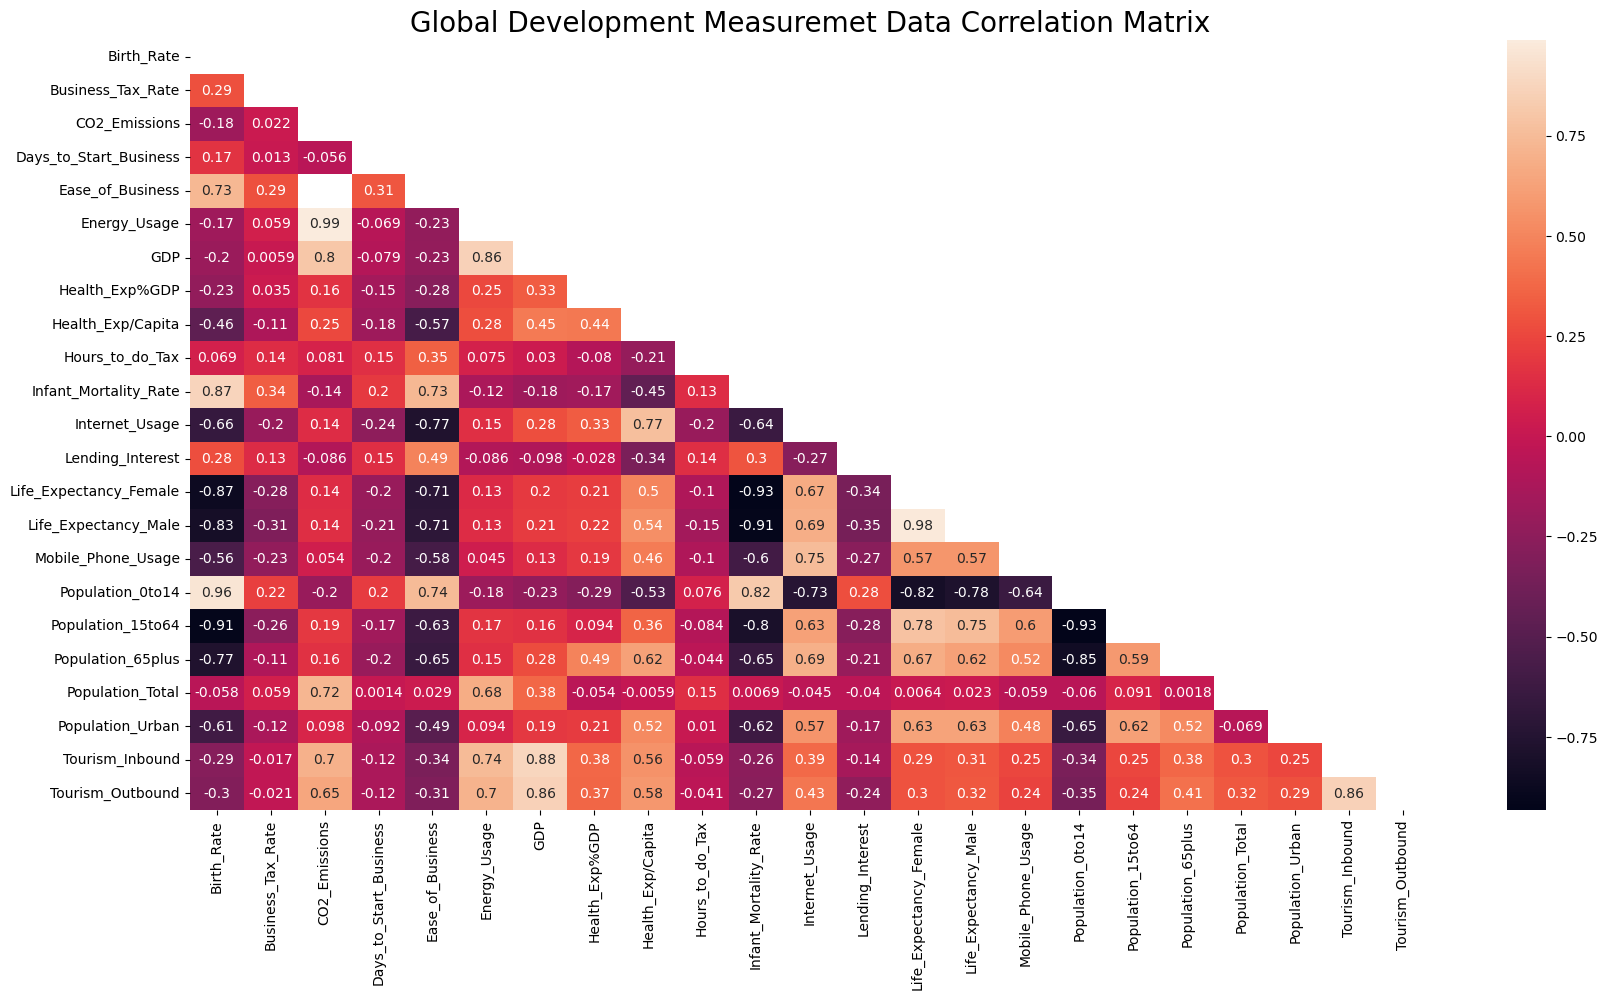

In [16]:
# Representation of correlation matrix using Heatmap
# Generate a mask for the upper triangle
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Global Development Measuremet Data Correlation Matrix', fontsize=20)
plt.show()


### Key Insights and Patterns from Above Correlation matrix of Heatmap:

- 1. Energy Usage and CO2 Emissions are highly positively correlated(r=0.99), The Energy generated through coal, natural gas, petroleum & fossil fuel causes high CO2 Emissions


- 2. Strong Positive correlation(r=0.96) between Population of 0 to 14 and the Birth Rate, in general the population from 0 to 14 directly depends on Birth Rate. If the Birth_Rate increases the Population from 0 to 14 increases, vice versa.


- 3. Highly Negative correlation(r=-0.93) between Life Expectancy Female and Infant Mortality Rate & (r=-0.91) Life Expectancy Male and Infant Mortality Rate, Life expectancy of both male and female highly affected by infant mortality.


- 4. Tourism Inbound, Outbound are positively correlated with GDP respectively 0.88 & 0.86.

### From the above observations we can see that the data has many underlying relationships between several variables to deal with collinearity problem we should use dimenionality reduction techniques to reduce the dimensions and getting most of the information/variability from the data

### Now lets understand the distribution of the data and handle the missing values by using appropriate  and suitable imputation techniques

In [17]:
df['Country'].nunique()

208

In [18]:
df['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

In [19]:
print('The total Countries are: ', df['Country'].nunique(),)
print('The country Names are as follows:',"\n \n",  df['Country'].unique())

The total Countries are:  208
The country Names are as follows: 
 
 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'N

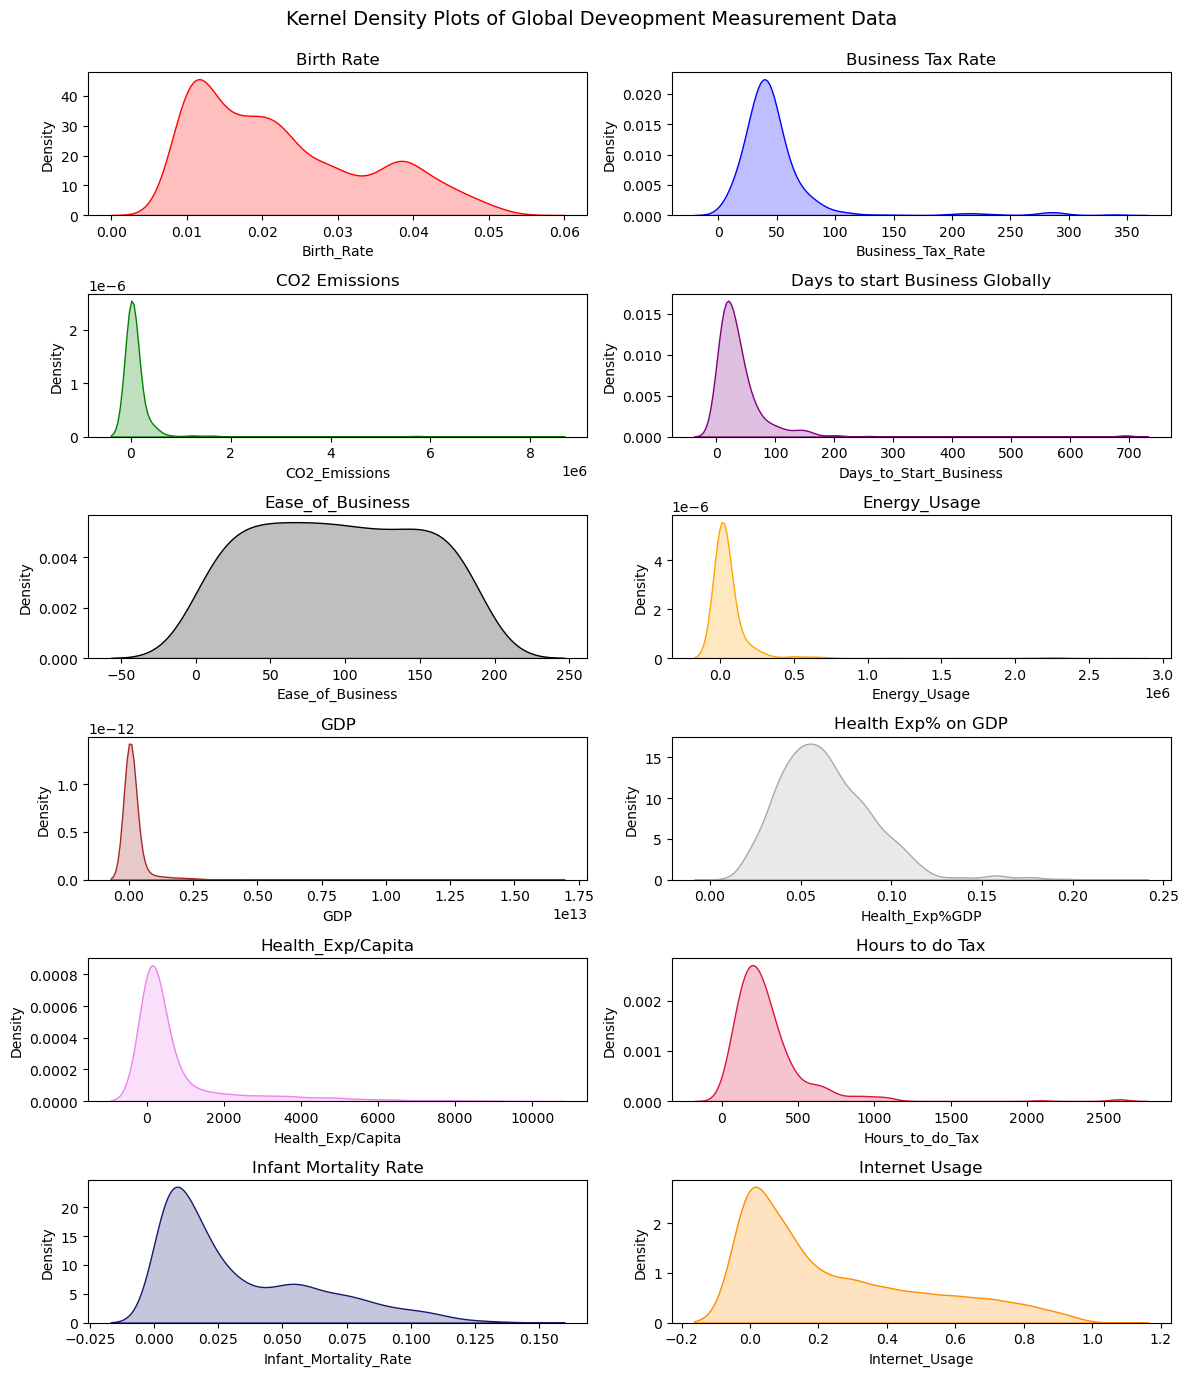

In [20]:
#Creating Subplots to visualize independent variables data

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Birth_Rate'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Business_Tax_Rate'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['CO2_Emissions'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Days_to_Start_Business'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Ease_of_Business'], shade=True, color='black')
sns.kdeplot(ax=axes[2,1], data=df['Energy_Usage'], shade=True, color='orange')
sns.kdeplot(ax=axes[3,0], data=df['GDP'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,1], data=df['Health_Exp%GDP'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[4,0], data=df['Health_Exp/Capita'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,1], data=df['Hours_to_do_Tax'], shade=True, color='crimson')
sns.kdeplot(ax=axes[5,0], data=df['Infant_Mortality_Rate'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,1], data=df['Internet_Usage'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Birth Rate')
axes[0,1].set_title('Business Tax Rate')
axes[1,0].set_title('CO2 Emissions')
axes[1,1].set_title('Days to start Business Globally')
axes[2,0].set_title('Ease_of_Business')
axes[2,1].set_title('Energy_Usage')
axes[3,0].set_title('GDP')
axes[3,1].set_title('Health Exp% on GDP')
axes[4,0].set_title('Health_Exp/Capita')
axes[4,1].set_title('Hours to do Tax')
axes[5,0].set_title('Infant Mortality Rate')
axes[5,1].set_title('Internet Usage')


fig.suptitle('Kernel Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

### Key Insights from Above KDE Plots:
- Features are right skewed distribution 
- Ease of doing business is platykurtic symmetrical distribution


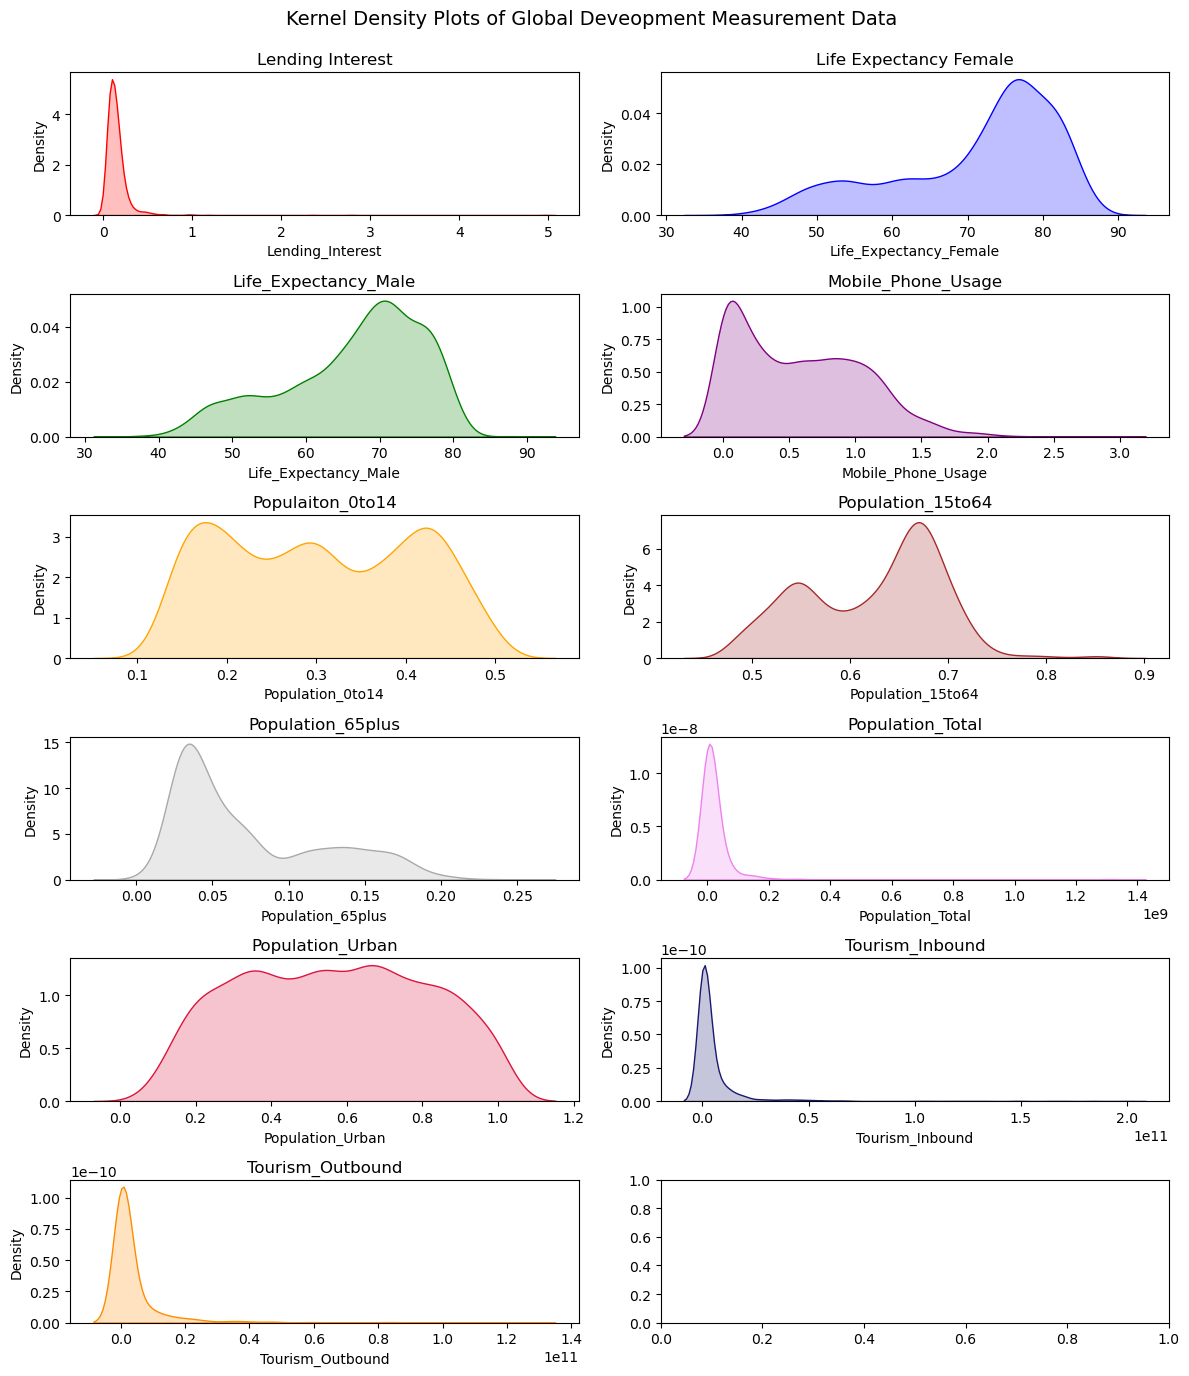

In [21]:
#Creating Subplots to visualize independent variables data

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Lending_Interest'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Life_Expectancy_Female'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['Life_Expectancy_Male'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Mobile_Phone_Usage'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Population_0to14'], shade=True, color='orange')
sns.kdeplot(ax=axes[2,1], data=df['Population_15to64'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,0], data=df['Population_65plus'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[3,1], data=df['Population_Total'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,0], data=df['Population_Urban'], shade=True, color='crimson')
sns.kdeplot(ax=axes[4,1], data=df['Tourism_Inbound'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,0], data=df['Tourism_Outbound'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Lending Interest')
axes[0,1].set_title('Life Expectancy Female')
axes[1,0].set_title('Life_Expectancy_Male')
axes[1,1].set_title('Mobile_Phone_Usage')
axes[2,0].set_title('Populaiton_0to14')
axes[2,1].set_title('Population_15to64')
axes[3,0].set_title('Population_65plus')
axes[3,1].set_title('Population_Total')
axes[4,0].set_title('Population_Urban')
axes[4,1].set_title('Tourism_Inbound')
axes[5,0].set_title('Tourism_Outbound')


fig.suptitle('Kernel Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

### Key Insights from Above KDE Plots: 
- Life Expectancy Female and Male & Population 15 ro 64 are left skewed distribution
- Lendning Interest Rate, Mobile Phone Usage, Population 65 plus & Tourism Inbound and Outbound are right skewed distribution
- Population Urban is platykurtic symmetrical distribution

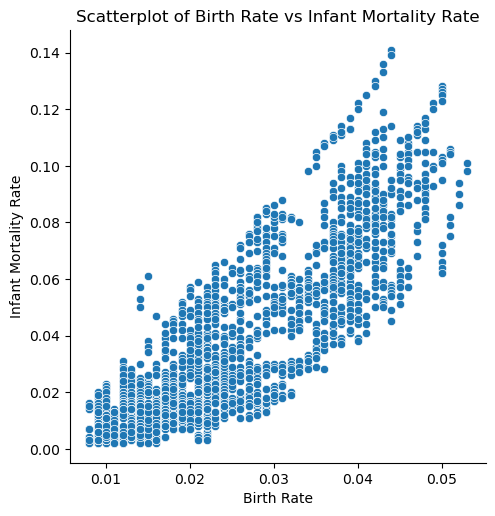

In [22]:
# Create a scatterplot for 'Birth_Rate' and 'Infant_Mortality_Rate'
sns.pairplot(df, x_vars=['Birth_Rate'], y_vars=['Infant_Mortality_Rate'],height=5)

plt.xlabel('Birth Rate')
plt.ylabel('Infant Mortality Rate')
plt.title('Scatterplot of Birth Rate vs Infant Mortality Rate')
plt.show()

### Key Obervations:
- The data points are overlapping and not spreaded, it means that there is a strong positive linear relationship between Birth Rate and Infant Mortality Rate

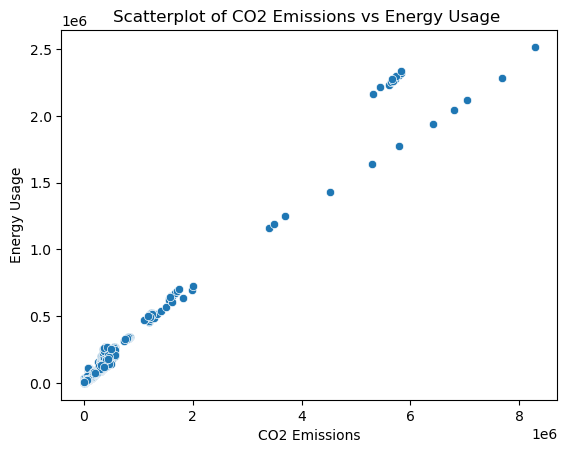

In [23]:
# Create a scatterplot for CO2 Emissions and Energy
sns.scatterplot(x='CO2_Emissions', y='Energy_Usage',data=df)

plt.xlabel('CO2 Emissions')
plt.ylabel('Energy Usage')
plt.title('Scatterplot of CO2 Emissions vs Energy Usage ')
plt.show()

### Key Insights:
- Positive linear relationship between Energy usage and CO2 Emissions
- From above linear relaitonship we can say that CO2 Emissions depends on Energy usage

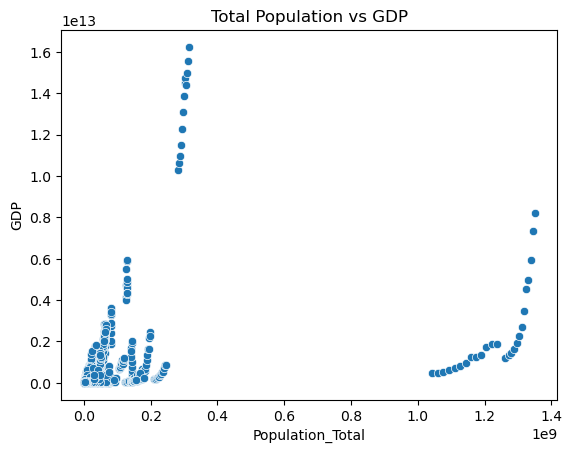

In [24]:
sns.scatterplot(x='Population_Total', y= 'GDP', data=df)
plt.title('Total Population vs GDP')
plt.show()

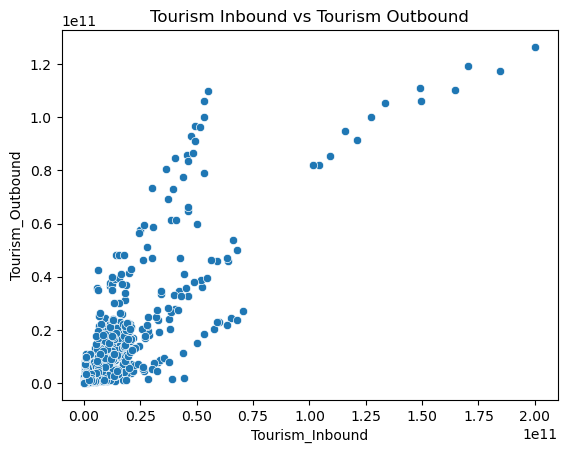

In [25]:
sns.scatterplot(x='Tourism_Inbound', y='Tourism_Outbound', data=df)
plt.title('Tourism Inbound vs Tourism Outbound')
plt.show()

In [26]:
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,Algeria
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,Angola
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,Benin
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,Botswana
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,Burkina Faso


In [27]:
# Extracting the top 10 GDP countries by using groupy
highest_gdp = df.groupby('Country')['GDP'].max()
highest_gdp=highest_gdp.sort_values(ascending=False)
highest_gdp.head(10)

Country
United States         1.624460e+13
China                 8.229490e+12
Japan                 5.937767e+12
Germany               3.628110e+12
United Kingdom        2.857083e+12
France                2.831795e+12
Brazil                2.476695e+12
Italy                 2.307312e+12
Russian Federation    2.017471e+12
India                 1.880100e+12
Name: GDP, dtype: float64

In [28]:
# Extracting data countrywise to understand the patterns of the data
US_data=df[df['Country']=='United States']
China_data=df[df['Country']=='China']
Japan_data=df[df['Country']=='Japan']
Germany_data=df[df['Country']=='Germany']
UK_data=df[df['Country']=='United Kingdom']
France_data=df[df['Country']=='France']
Brazil_data=df[df['Country']=='Brazil']
Italy_data=df[df['Country']=='Italy']
Russia_data=df[df['Country']=='Russian Federation']
India_data=df[df['Country']=='India']
US_data

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
204,0.014,NaN,5713560.0,NaN,NaN,2273332.0,1.028970e+13,0.136,4790.0,NaN,...,74.0,0.4,0.213,0.663,0.124,282162411,0.791,1.209120e+11,9.147300e+10,United States
412,0.014,NaN,5601405.0,NaN,NaN,2230817.0,1.062530e+13,0.142,5138.0,NaN,...,74.0,0.4,0.212,0.665,0.123,284968955,0.792,1.091030e+11,8.561000e+10,United States
620,0.014,NaN,5650950.0,NaN,NaN,2255957.0,1.098020e+13,0.151,5578.0,NaN,...,74.0,0.5,0.210,0.667,0.123,287625193,0.794,1.044270e+11,8.186000e+10,United States
828,0.014,NaN,5681664.0,6.0,NaN,2261151.0,1.151220e+13,0.156,5993.0,NaN,...,75.0,0.5,0.209,0.669,0.123,290107933,0.796,1.015350e+11,8.209100e+10,United States
1036,0.014,NaN,5790765.0,6.0,NaN,2307819.0,1.227700e+13,0.157,6355.0,NaN,...,75.0,0.6,0.207,0.670,0.123,292805298,0.798,1.156890e+11,9.476400e+10,United States
1244,0.014,45.8,5826394.0,6.0,NaN,2318861.0,1.309540e+13,0.158,6732.0,325.0,...,75.0,0.7,0.205,0.671,0.123,295516599,0.799,1.272370e+11,1.002500e+11,United States
1452,0.014,47.4,5737616.0,6.0,NaN,2296686.0,1.385790e+13,0.159,7110.0,325.0,...,75.0,0.8,0.204,0.672,0.124,298379912,0.801,1.333930e+11,1.054760e+11,United States
1660,0.014,46.1,5828697.0,6.0,NaN,2337014.0,1.448030e+13,0.161,7486.0,325.0,...,75.0,0.8,0.202,0.673,0.125,301231207,0.803,1.488460e+11,1.111020e+11,United States
1868,0.014,46.4,5656839.0,5.0,NaN,2277034.0,1.472030e+13,0.165,7769.0,187.0,...,76.0,0.9,0.201,0.673,0.127,304093966,0.804,1.705240e+11,1.192170e+11,United States
2076,0.014,46.1,5311840.0,5.0,NaN,2164458.0,1.441790e+13,0.177,8009.0,187.0,...,76.0,0.9,0.200,0.672,0.128,306771529,0.806,1.495100e+11,1.062850e+11,United States


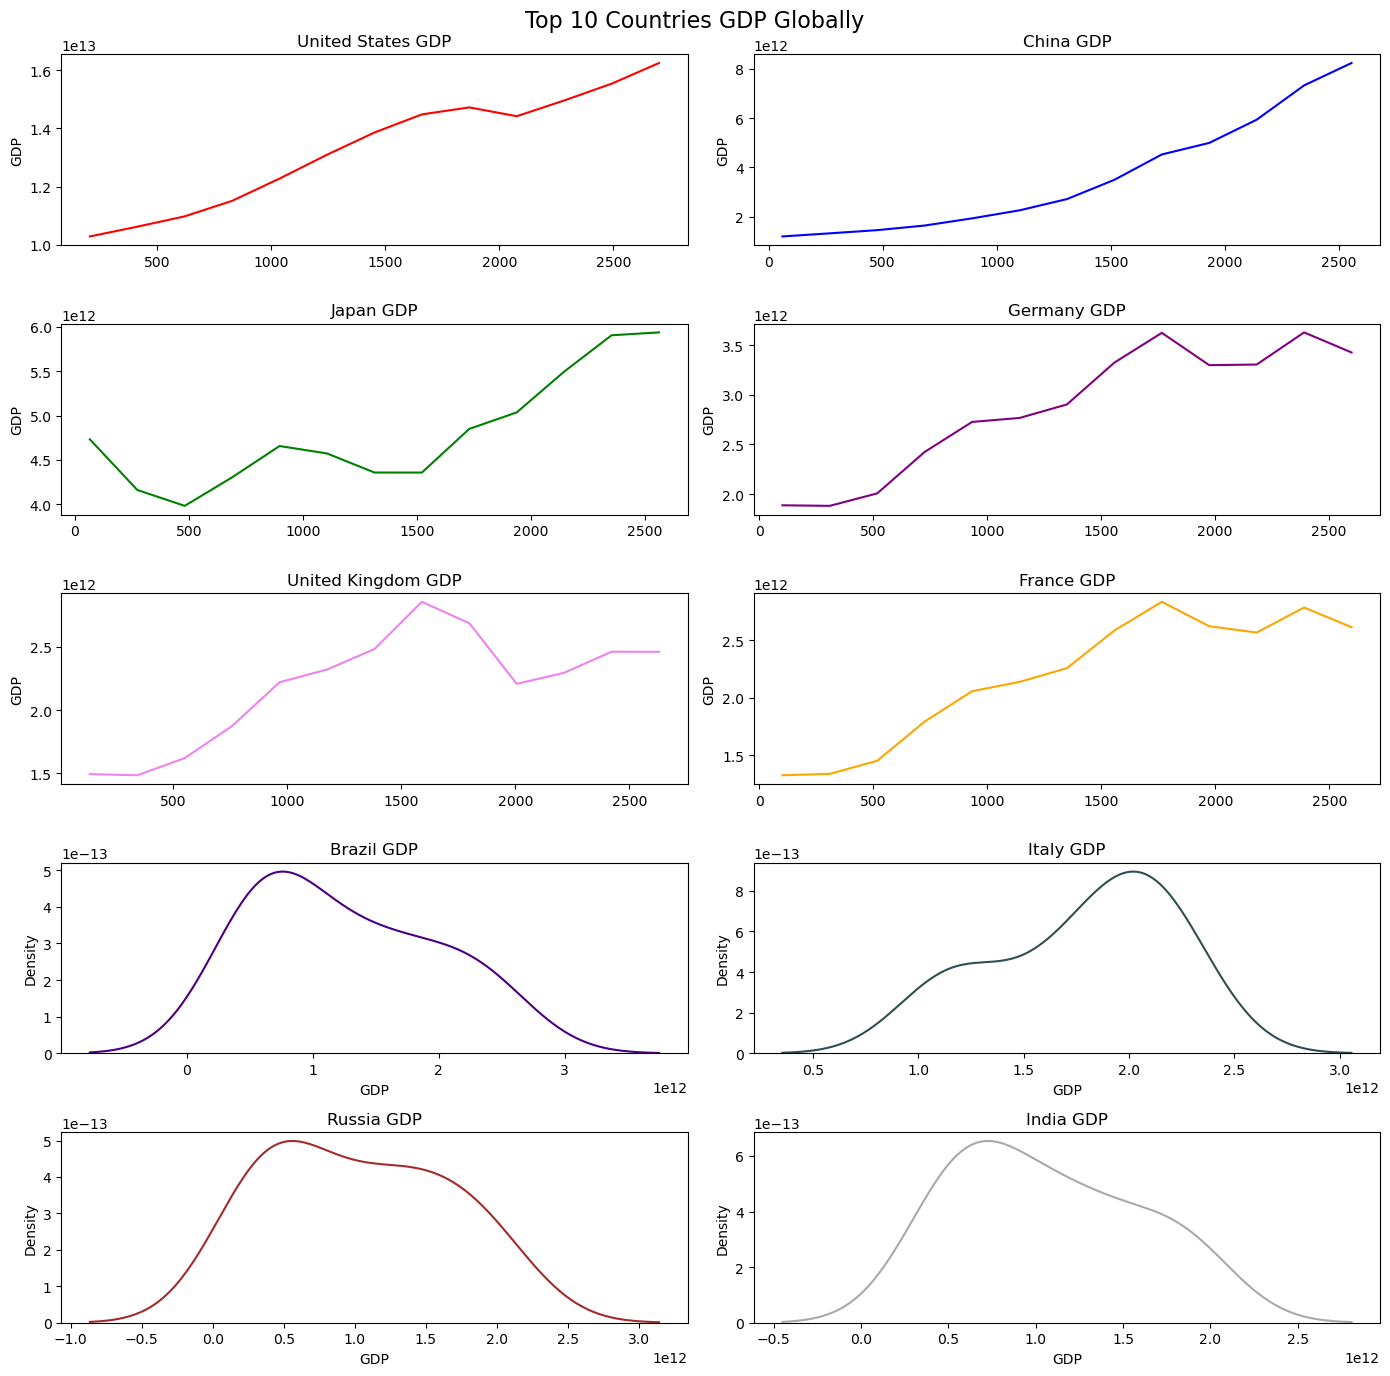

In [29]:
# Plotting Top 10 Coutries GDP 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))

#Plot KDE plots

sns.lineplot(ax=axes[0,0], data=US_data['GDP'],  color='red')
sns.lineplot(ax=axes[0,1], data=China_data['GDP'],  color='blue')
sns.lineplot(ax=axes[1,0], data=Japan_data['GDP'],  color='green')
sns.lineplot(ax=axes[1,1], data=Germany_data['GDP'],  color='purple')
sns.lineplot(ax=axes[2,0], data=UK_data['GDP'],  color='violet')
sns.lineplot(ax=axes[2,1], data=France_data['GDP'],  color='orange')
sns.kdeplot(ax=axes[3,0], data=Brazil_data['GDP'], color='indigo')
sns.kdeplot(ax=axes[3,1], data=Italy_data['GDP'], color='darkslategrey')
sns.kdeplot(ax=axes[4,0], data=Russia_data['GDP'], color='brown')
sns.kdeplot(ax=axes[4,1], data=India_data['GDP'], color='darkgrey')

#Set plot titles and labels
axes[0,0].set_title('United States GDP')
axes[0,1].set_title('China GDP')
axes[1,0].set_title('Japan GDP')
axes[1,1].set_title('Germany GDP')
axes[2,0].set_title('United Kingdom GDP')
axes[2,1].set_title('France GDP')
axes[3,0].set_title('Brazil GDP')
axes[3,1].set_title('Italy GDP')
axes[4,0].set_title('Russia GDP')
axes[4,1].set_title('India GDP')

fig.suptitle('Top 10 Countries GDP Globally', fontsize=16)
plt.tight_layout()
plt.show()

## Key Insights from the above lineplots:
1. The countries GDP line plots are not constant, GDP for the countries has a clear trend
2. We can observe that the countries United States, China, Japan , Germany, United kingdom & France are having clear increasing trend
3. Brazil, Italy, Russia and India are having decreasing Trend over a period of time

We can conclude that the data has a clear trend, its a time series data

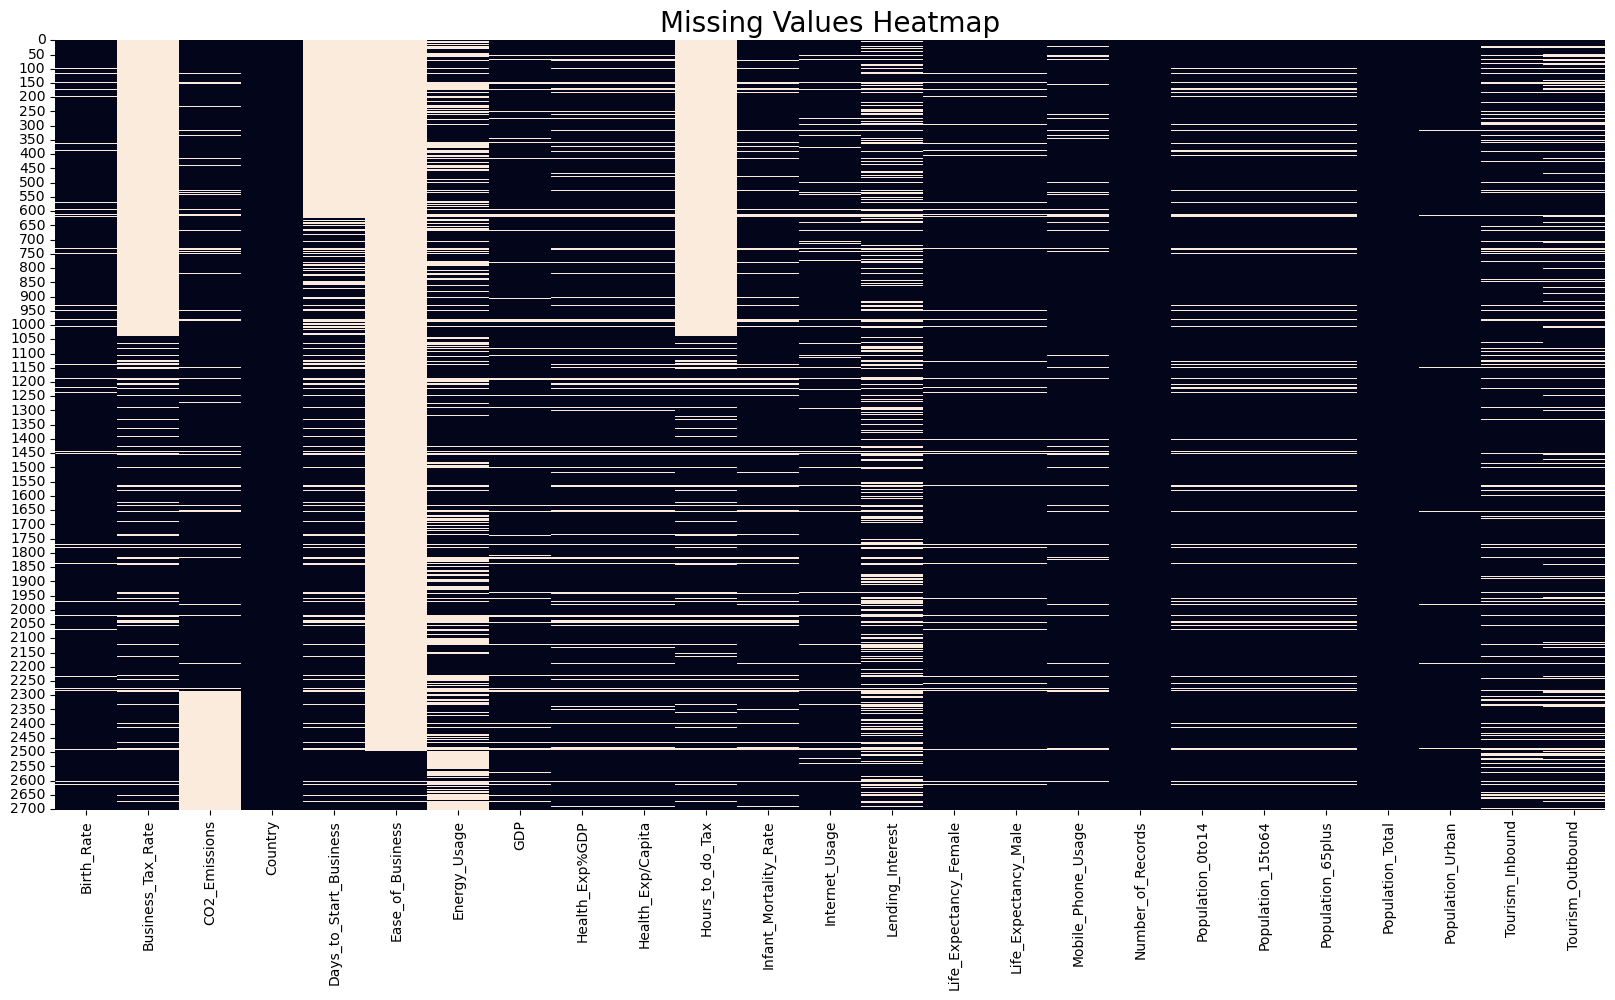

In [294]:
# Plotting missing values of the data by using Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap', fontsize=20)
plt.show()

## Key Insights from above Heatmap:
1. The data set has many missing values
2. Ease of doing business has highest missing values, followed by Hours to do tax & Business Tax Rate
3. Country, Number of Records & Total Population are the only features which doesnt have any missing values

## Handling Missing Values

In [31]:
# Null Values Percentage
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        a=round(a,2)
        print(i ,':' ,'\t',a)
        if a>=0:
            null_pertanage.append(i)
null_per(df)

Birth_Rate : 	 4.4
Business_Tax_Rate : 	 47.37
CO2_Emissions : 	 21.41
Days_to_Start_Business : 	 36.46
Ease_of_Business : 	 93.16
Energy_Usage : 	 33.99
GDP : 	 7.77
Health_Exp%GDP : 	 11.43
Health_Exp/Capita : 	 11.43
Hours_to_do_Tax : 	 47.63
Infant_Mortality_Rate : 	 9.62
Internet_Usage : 	 6.4
Lending_Interest : 	 30.47
Life_Expectancy_Female : 	 5.03
Life_Expectancy_Male : 	 5.03
Mobile_Phone_Usage : 	 6.18
Population_0to14 : 	 8.14
Population_15to64 : 	 8.14
Population_65plus : 	 8.14
Population_Total : 	 0.0
Population_Urban : 	 0.96
Tourism_Inbound : 	 13.61
Tourism_Outbound : 	 17.42
Country : 	 0.0


In [32]:
# Dropping Ease of Business which has 93% missing values
df=df.drop('Ease_of_Business', axis=1)

### Using KNN Imputer for missing values
- KNN imputation is a non-parametric method that does not require any assumptions about the underlying distribution of the data.


In [33]:
from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=3)
df_impute=df.drop('Country', axis=1)
imputed=knnimputer.fit_transform(df_impute)
df_imputed=pd.DataFrame(imputed, columns=df_impute.columns)
df_imputed

In [54]:
# Droppping features with high missing values, unnecessary features
df_imputed=df_imputed.drop(columns=['Business_Tax_Rate', 'Hours_to_do_Tax','Days_to_Start_Business','Lending_Interest','Health_Exp/Capita'], axis=True)

df_imputed

,Birth_Rate,CO2_Emissions,Energy_Usage,GDP,Health_Exp%GDP,Infant_Mortality_Rate,Internet_Usage,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020000,87931.000000,26998.000000,5.479006e+10,0.035000,0.034,0.000000,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050000,9542.000000,7499.000000,9.129595e+09,0.034000,0.117,0.000000,47.000000,44.000000,0.000000,0.476,0.499000,0.025000,1.392493e+07,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043000,1617.000000,1983.000000,2.359122e+09,0.043000,0.090,0.000000,57.000000,53.000000,0.000000,0.454,0.517000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027000,4276.000000,1836.000000,5.788312e+09,0.047000,0.054,0.000000,52.000000,49.000000,0.100000,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046000,1041.000000,13489.333333,2.610959e+09,0.051000,0.096,0.000000,52.000000,49.000000,0.000000,0.468,0.505000,0.028000,1.160794e+07,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,160.000000,78.000000,2.741753e+09,0.033333,0.004,0.466667,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,3.242700e+04,0.911,5.036667e+08,1.403333e+08,Turks and Caicos Islands
2700,0.013000,79142.666667,56408.250000,2.383531e+11,0.122125,0.006,0.800000,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,4.903473e+07,0.811,7.191000e+09,4.330500e+09,United States
2701,0.015000,590.333333,22263.000000,5.000435e+10,0.089000,0.010,0.500000,80.000000,74.000000,1.500000,0.220,0.639000,0.140000,3.395253e+06,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,0.020000,79142.666667,21639.000000,2.383531e+11,0.046000,0.013,0.500000,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [55]:
null_per(df_imputed)

Birth_Rate : 	 0.0
CO2_Emissions : 	 0.0
Energy_Usage : 	 0.0
GDP : 	 0.0
Health_Exp%GDP : 	 0.0
Infant_Mortality_Rate : 	 0.0
Internet_Usage : 	 0.0
Life_Expectancy_Female : 	 0.0
Life_Expectancy_Male : 	 0.0
Mobile_Phone_Usage : 	 0.0
Population_0to14 : 	 0.0
Population_15to64 : 	 0.0
Population_65plus : 	 0.0
Population_Total : 	 0.0
Population_Urban : 	 0.0
Tourism_Inbound : 	 0.0
Tourism_Outbound : 	 0.0
Country : 	 0.0


In [56]:
df_imputed['Country']=df['Country']

## Outliers Detection  with IQR 

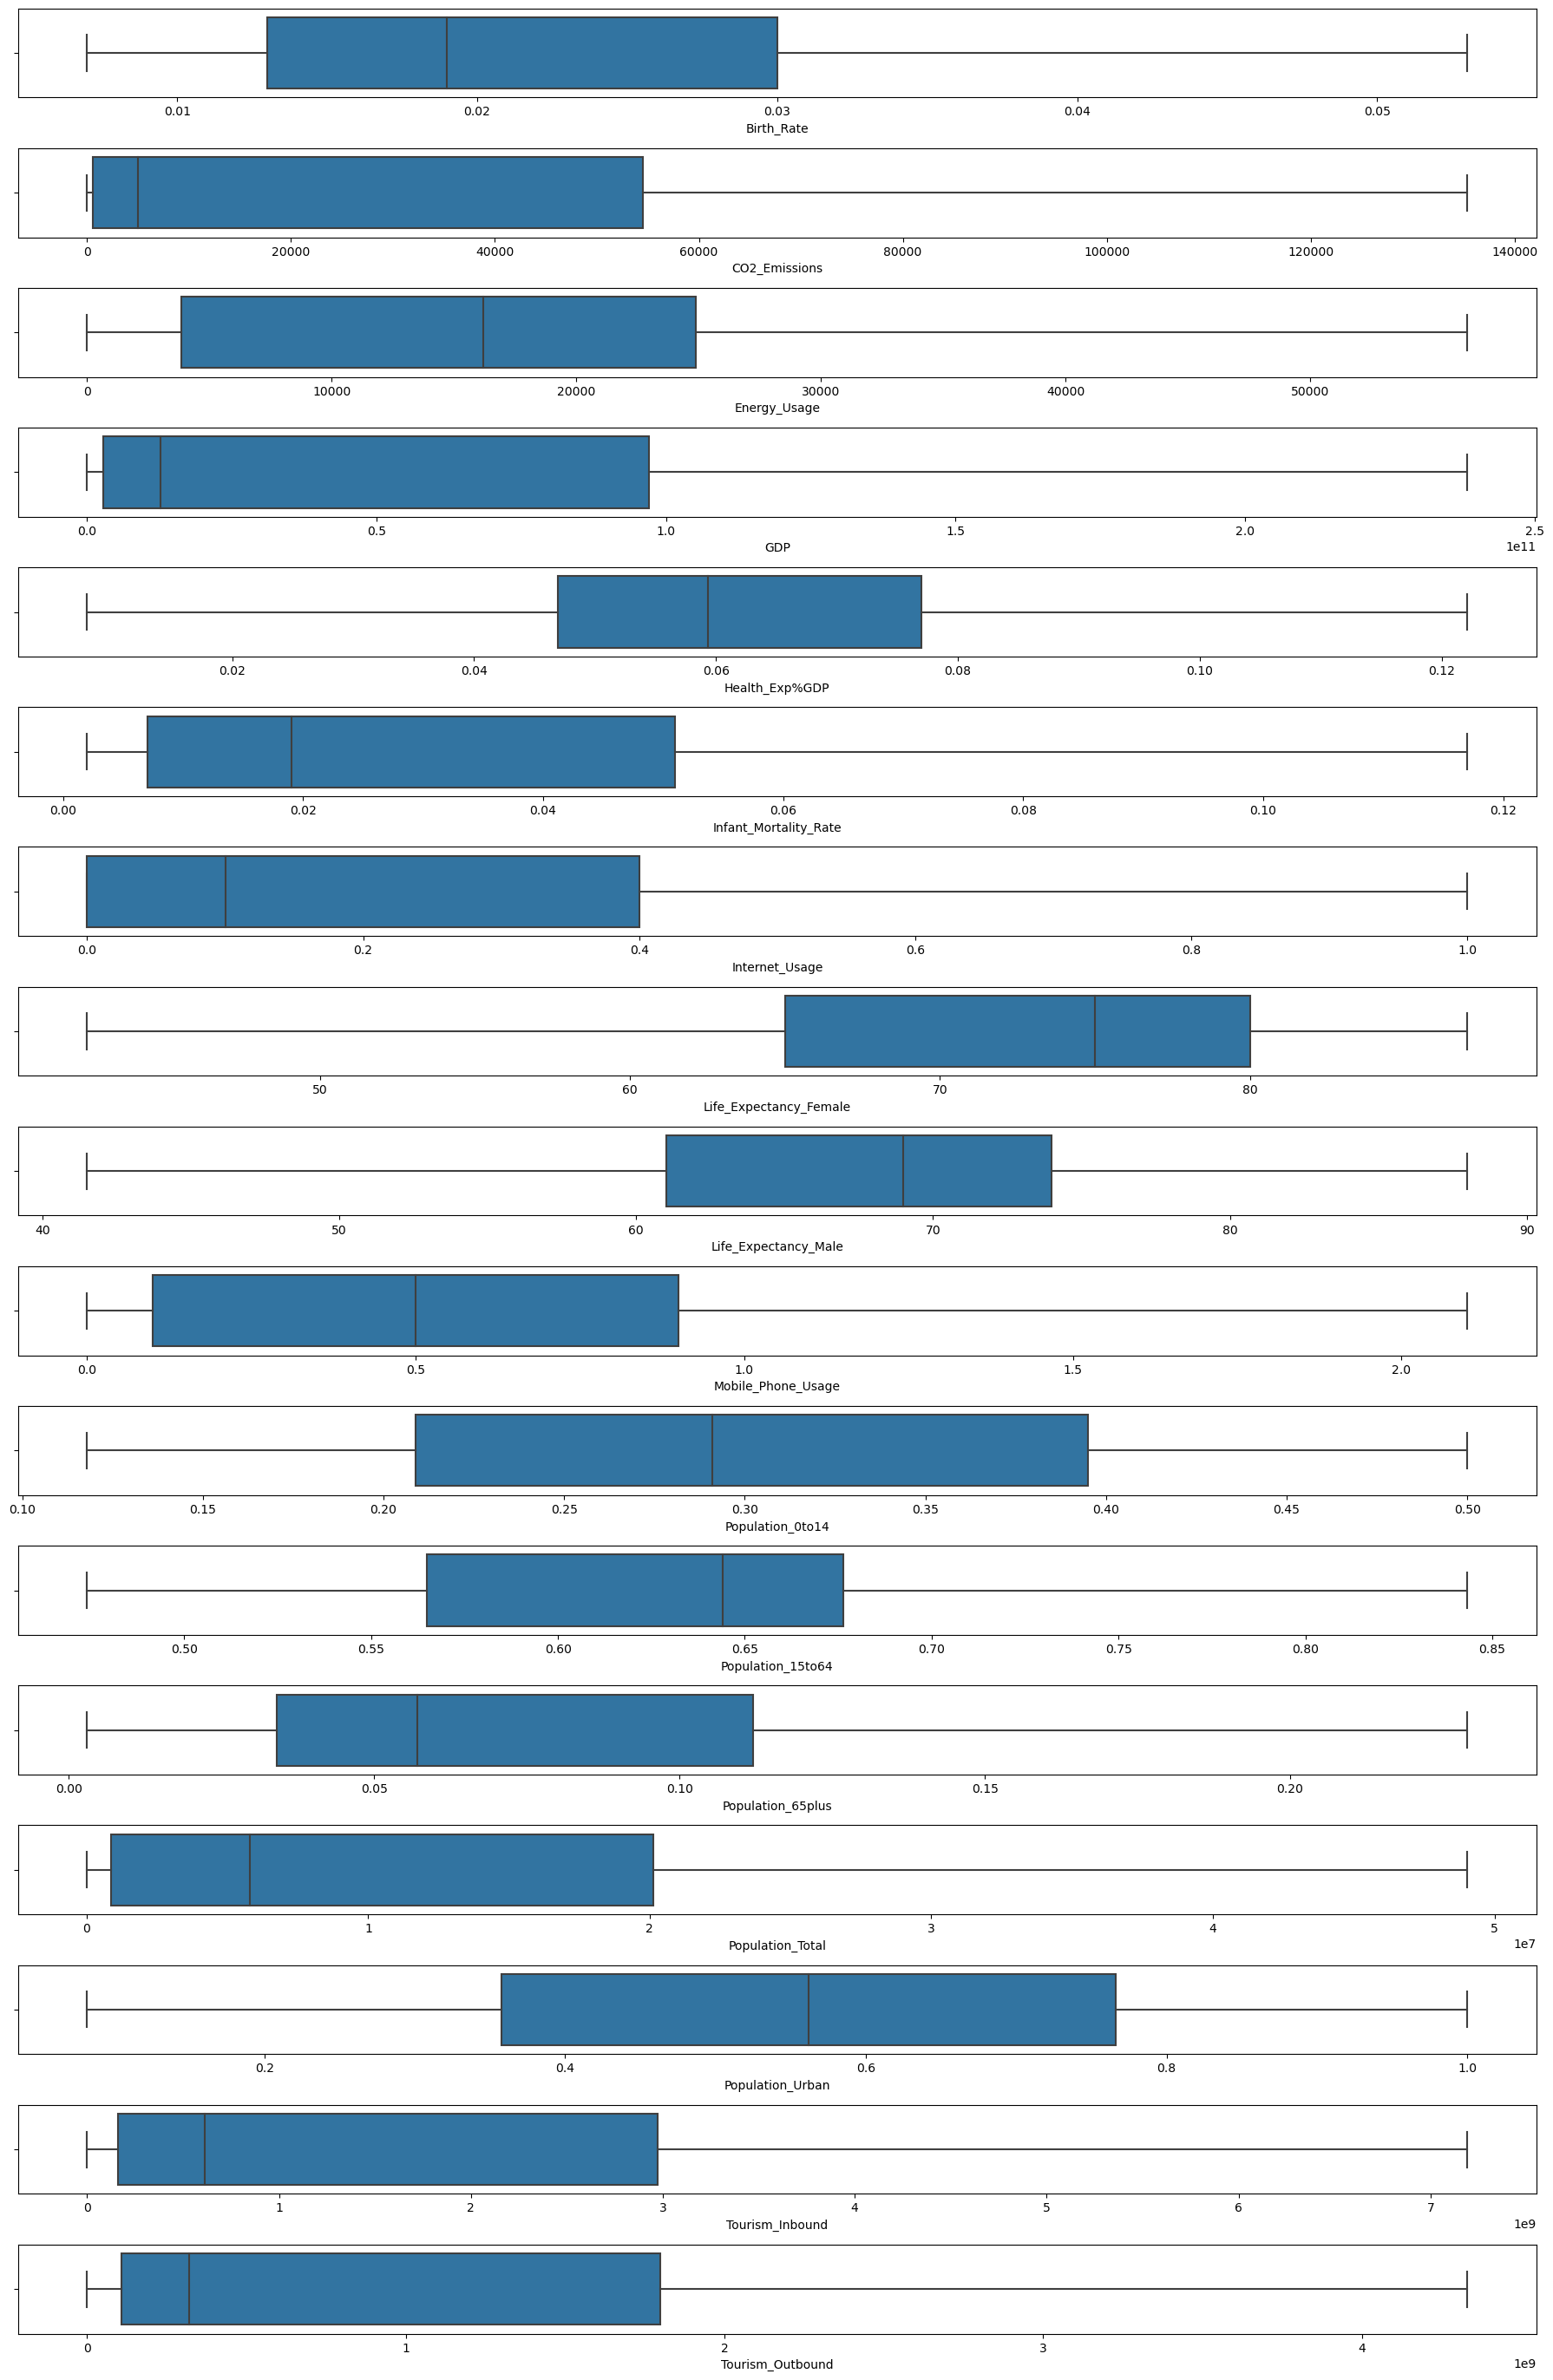

In [57]:
# Plotting Boxplot to find the outliers in the dataset
df_box=df_imputed.drop('Country', axis=1)
plt.figure(figsize=(18,40))
for i, j in enumerate(df_box.columns):
    plt.subplot(25,1,i+1)
    sns.boxplot(x=df_box[j])
    plt.xlabel(j)
    plt.tight_layout()

In [58]:
for cols in df_imputed.columns:
    if cols != 'Country':
        Q1 = df_imputed[cols].quantile(0.25)
        Q3 = df_imputed[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_imputed[cols] = np.where(df_imputed[cols] < lower_bound, lower_bound, df_imputed[cols])
        df_imputed[cols] = np.where(df_imputed[cols] > upper_bound, upper_bound, df_imputed[cols])

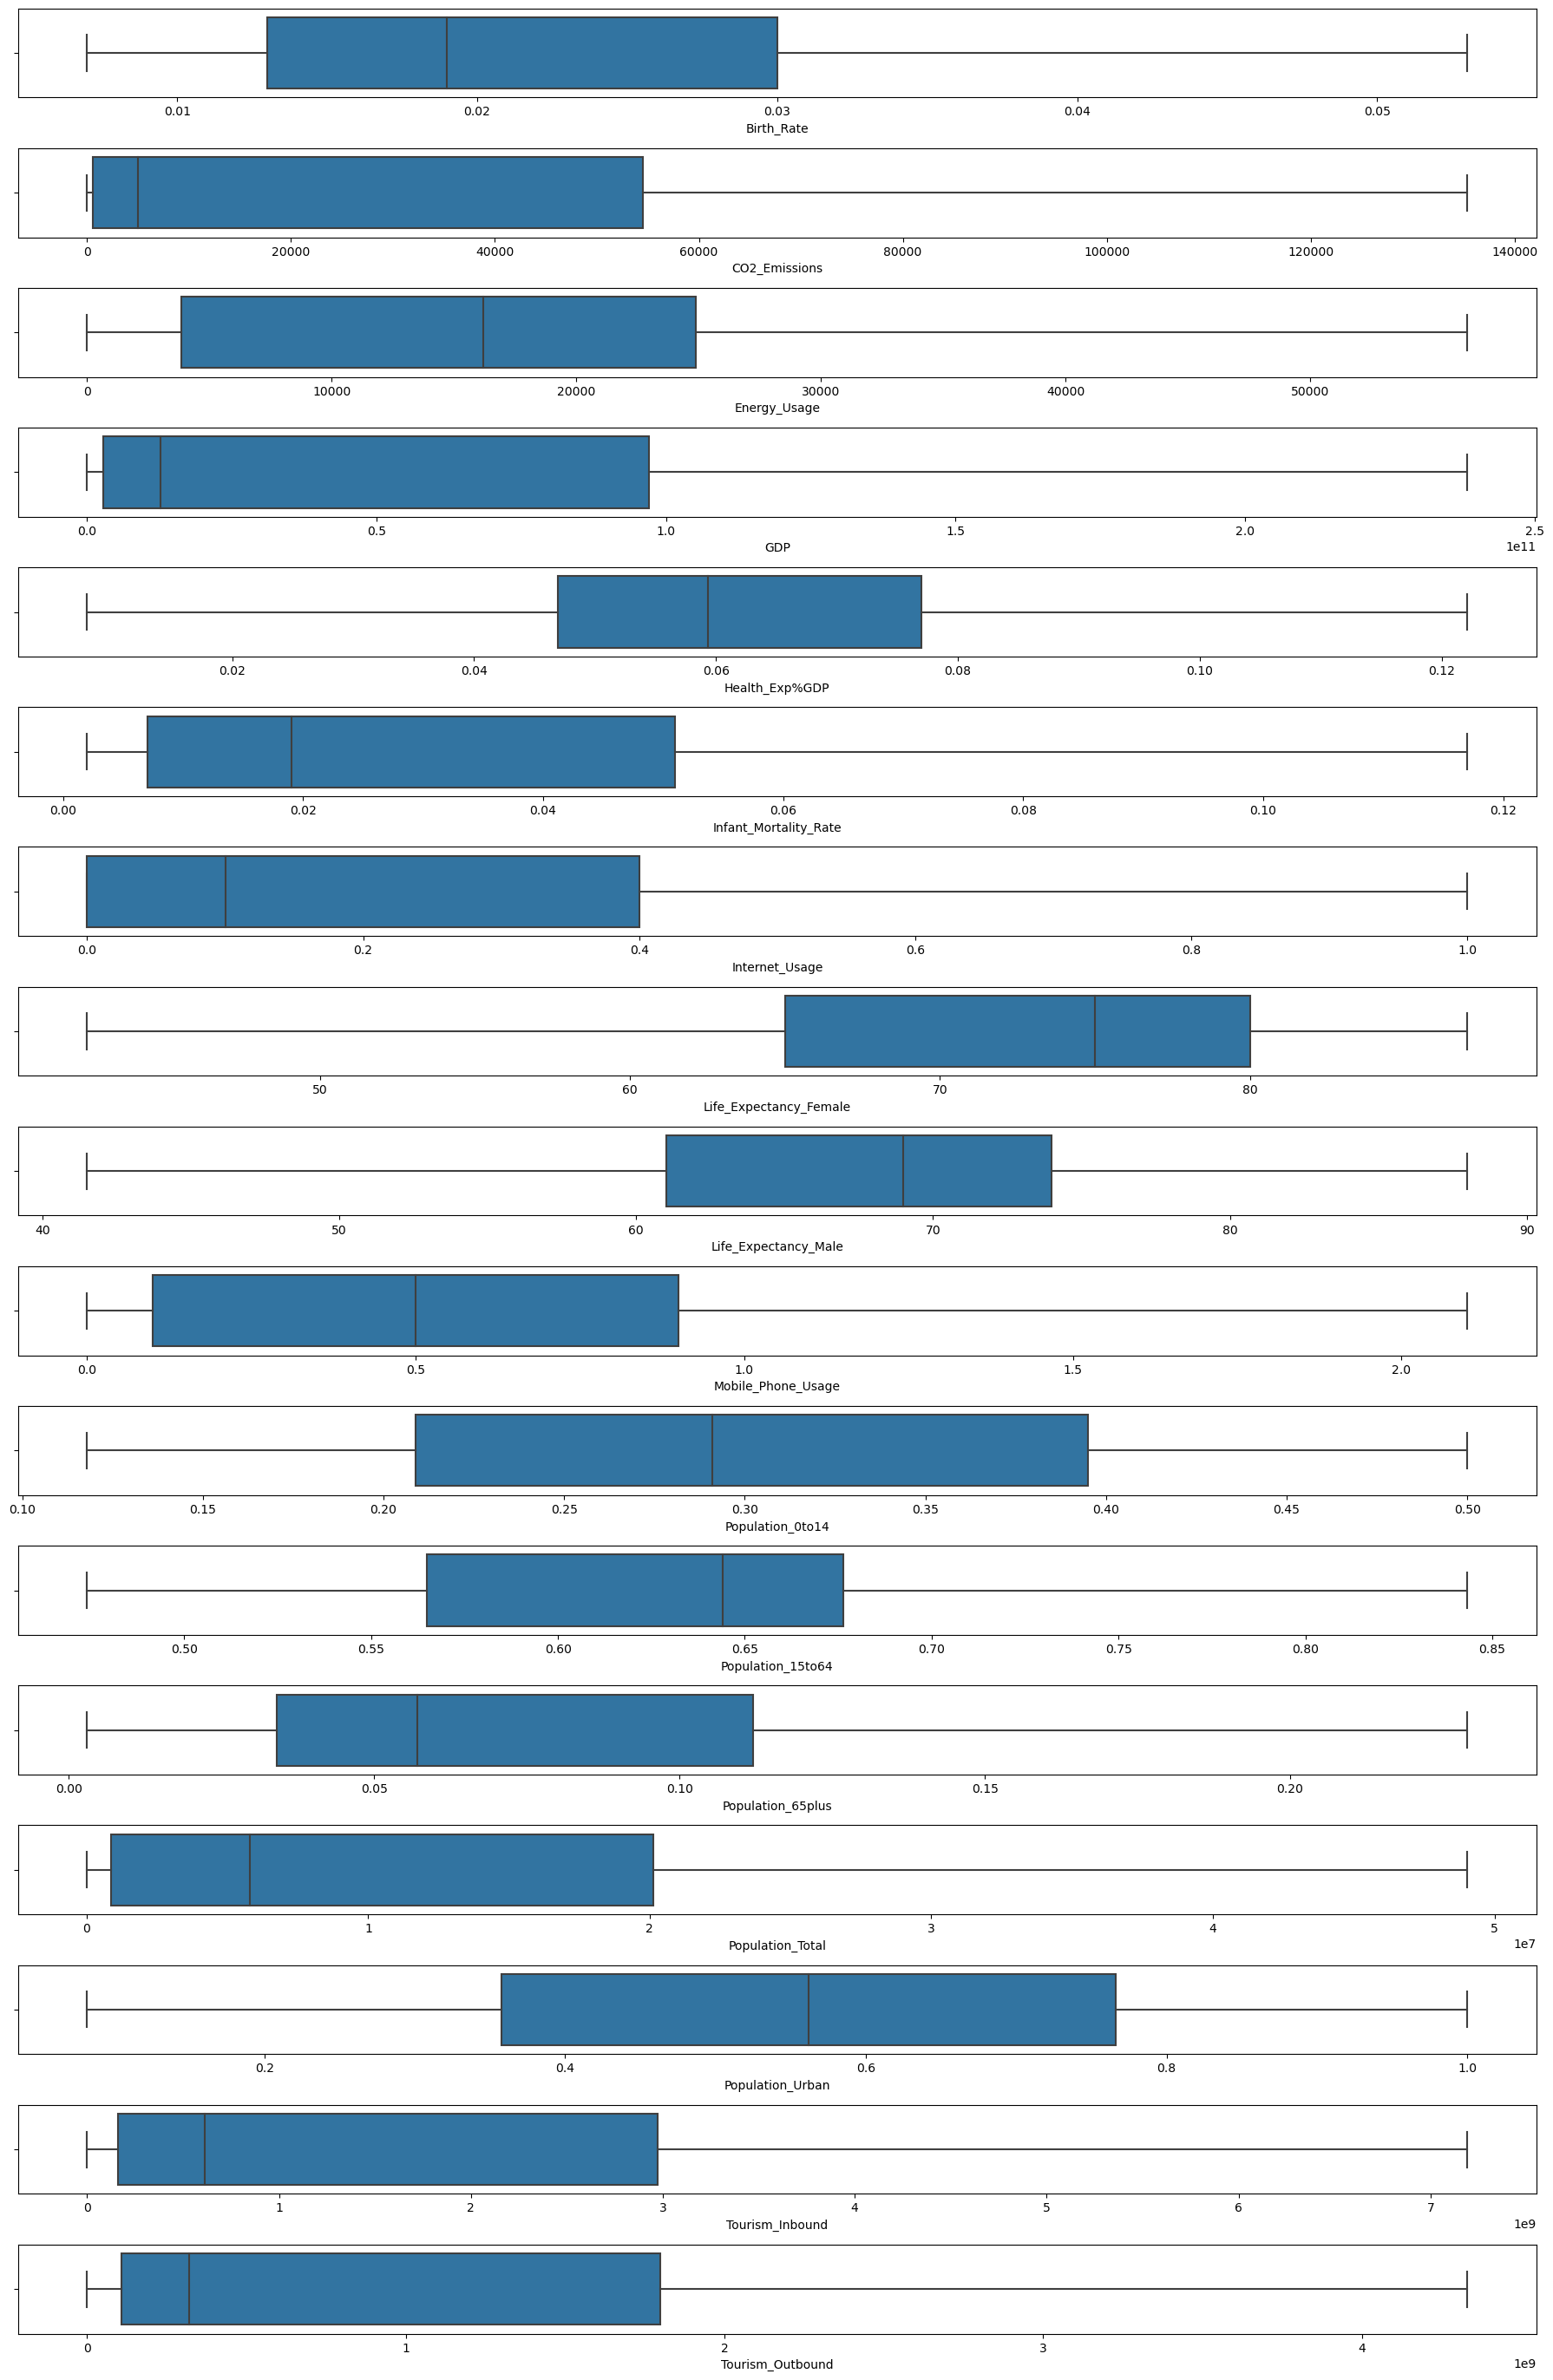

In [59]:
# Plotting Boxplot to find the outliers in the dataset
df_box=df_imputed.drop('Country', axis=1)
plt.figure(figsize=(18,40))
for i, j in enumerate(df_box.columns):
    plt.subplot(25,1,i+1)
    sns.boxplot(x=df_box[j])
    plt.xlabel(j)
    plt.tight_layout()

In [60]:
df_imputed

,Birth_Rate,CO2_Emissions,Energy_Usage,GDP,Health_Exp%GDP,Infant_Mortality_Rate,Internet_Usage,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020000,87931.000000,26998.000000,5.479006e+10,0.035000,0.034,0.000000,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050000,9542.000000,7499.000000,9.129595e+09,0.034000,0.117,0.000000,47.000000,44.000000,0.000000,0.476,0.499000,0.025000,1.392493e+07,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043000,1617.000000,1983.000000,2.359122e+09,0.043000,0.090,0.000000,57.000000,53.000000,0.000000,0.454,0.517000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027000,4276.000000,1836.000000,5.788312e+09,0.047000,0.054,0.000000,52.000000,49.000000,0.100000,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046000,1041.000000,13489.333333,2.610959e+09,0.051000,0.096,0.000000,52.000000,49.000000,0.000000,0.468,0.505000,0.028000,1.160794e+07,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,160.000000,78.000000,2.741753e+09,0.033333,0.004,0.466667,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,3.242700e+04,0.911,5.036667e+08,1.403333e+08,Turks and Caicos Islands
2700,0.013000,79142.666667,56408.250000,2.383531e+11,0.122125,0.006,0.800000,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,4.903473e+07,0.811,7.191000e+09,4.330500e+09,United States
2701,0.015000,590.333333,22263.000000,5.000435e+10,0.089000,0.010,0.500000,80.000000,74.000000,1.500000,0.220,0.639000,0.140000,3.395253e+06,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,0.020000,79142.666667,21639.000000,2.383531e+11,0.046000,0.013,0.500000,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [61]:
# Checking for the Pattern Match that the sum of three columns Population 0 to 14, 15 to 64 & 65+ are approximately equal to one
a=df_imputed['Population_0to14']+df_imputed['Population_15to64']+df_imputed['Population_65plus']

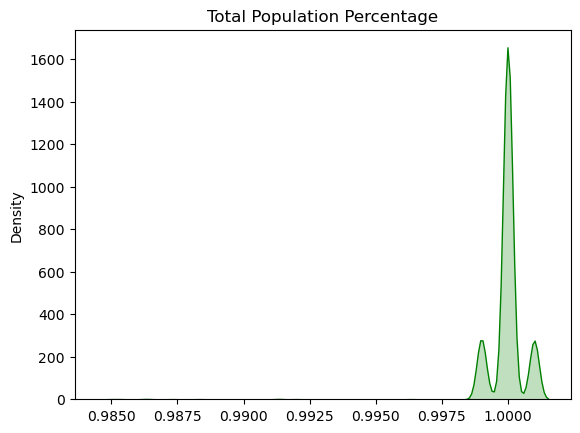

In [62]:
# Calculating Total Populaion Percentage(it should be 1) Pattern after imputing the missing values
sns.kdeplot(a, shade=True, color='green')
plt.title('Total Population Percentage')
plt.show()

### Key Insights from the above KDE plot:
-  We have unveiled the pattern that the sum of the Population from 0-14 & 15-64 & 64+ are equals to 1
-  After imputing the missing values we can observe that the data is lying in between 0.999 to 1.0010, hence we can say that we have imputed the missing data successfully without any deviation

## Assessing the clustering tendency of the data set by using Hopkins Statistic

- The Hopkins statistic measures the tendency of a dataset to cluster. It compares the distances between the data points and their nearest neighbors to the distances between a set of randomly generated points and their nearest neighbors. The data is highly clusterable, if the Hopkins statistic is closer to 1. The data is not clusterable, if the Hopkins statistic is closer to 0.5.

In [52]:
df2=df_imputed.copy()
# Label Encoder for Country Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Country']=le.fit_transform(df2['Country'])
df2.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020,44.033333,87931.0,32.666667,26998.000000,5.479006e+10,0.035,60.0,275.666667,0.034,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2
1,0.050,40.533333,9542.0,22.000000,7499.000000,9.129595e+09,0.034,22.0,241.333333,0.117,...,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,5
2,0.043,40.533333,1617.0,22.000000,1983.000000,2.359122e+09,0.043,15.0,241.333333,0.090,...,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20
3,0.027,40.533333,4276.0,22.000000,1836.000000,5.788312e+09,0.047,152.0,241.333333,0.054,...,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25
4,0.046,54.633333,1041.0,36.666667,13489.333333,2.610959e+09,0.051,12.0,296.000000,0.096,...,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29


In [63]:
# Defining Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [64]:
hopkins(df2)

0.8565178782166278

### Insights from Hopkins Statistic:
- The given dataset is most suitable for creating a clustering model, since the hopkins statistic value is 0.9921 which is very very near to 1

## Scaling the Data

In [117]:
df1=df_imputed.iloc[:,:-1] # Removed Country column
df1

,Birth_Rate,CO2_Emissions,Energy_Usage,GDP,Health_Exp%GDP,Infant_Mortality_Rate,Internet_Usage,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020000,87931.000000,26998.000000,5.479006e+10,0.035000,0.034,0.000000,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08
1,0.050000,9542.000000,7499.000000,9.129595e+09,0.034000,0.117,0.000000,47.000000,44.000000,0.000000,0.476,0.499000,0.025000,1.392493e+07,0.324,3.400000e+07,1.460000e+08
2,0.043000,1617.000000,1983.000000,2.359122e+09,0.043000,0.090,0.000000,57.000000,53.000000,0.000000,0.454,0.517000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07
3,0.027000,4276.000000,1836.000000,5.788312e+09,0.047000,0.054,0.000000,52.000000,49.000000,0.100000,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08
4,0.046000,1041.000000,13489.333333,2.610959e+09,0.051000,0.096,0.000000,52.000000,49.000000,0.000000,0.468,0.505000,0.028000,1.160794e+07,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,160.000000,78.000000,2.741753e+09,0.033333,0.004,0.466667,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,3.242700e+04,0.911,5.036667e+08,1.403333e+08
2700,0.013000,79142.666667,56408.250000,2.383531e+11,0.122125,0.006,0.800000,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,4.903473e+07,0.811,7.191000e+09,4.330500e+09
2701,0.015000,590.333333,22263.000000,5.000435e+10,0.089000,0.010,0.500000,80.000000,74.000000,1.500000,0.220,0.639000,0.140000,3.395253e+06,0.948,2.222000e+09,1.028000e+09
2702,0.020000,79142.666667,21639.000000,2.383531e+11,0.046000,0.013,0.500000,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df1)
scaled_data

array([[0.2826087 , 0.64959513, 0.47854398, ..., 0.56318083, 0.01408842,
        0.04452347],
       [0.93478261, 0.07044595, 0.13281856, ..., 0.26361656, 0.00463124,
        0.03366972],
       [0.7826087 , 0.01189491, 0.03501758, ..., 0.32788671, 0.01061152,
        0.01150036],
       ...,
       [0.17391304, 0.00430975, 0.39459045, ..., 0.94335512, 0.30893009,
        0.23735076],
       [0.2826087 , 0.58466566, 0.38352667, ..., 0.87908497, 0.12562758,
        0.7393945 ],
       [0.08695652, 0.00108606, 0.0012825 , ..., 0.94444444, 0.01158505,
        0.00203219]])

In [121]:
scaled_data=pd.DataFrame(scaled_data, columns=df1.columns)

In [122]:
# Adding Country Column
scaled_data['Country']=df_imputed['Country']
scaled_data.head()

,Birth_Rate,CO2_Emissions,Energy_Usage,GDP,Health_Exp%GDP,Infant_Mortality_Rate,Internet_Usage,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.282609,0.649595,0.478544,0.229665,0.236583,0.278261,0.0,0.640449,0.548387,0.000000,0.586387,0.392599,0.159292,0.646741,0.563181,0.014088,0.044523,Algeria
1,0.934783,0.070446,0.132819,0.038048,0.227820,1.000000,0.0,0.101124,0.053763,0.000000,0.937173,0.067690,0.097345,0.283705,0.263617,0.004631,0.033670,Angola
2,0.782609,0.011895,0.035018,0.009635,0.306681,0.765217,0.0,0.325843,0.247312,0.000000,0.879581,0.116426,0.115044,0.141393,0.327887,0.010612,0.011500,Benin
3,0.434783,0.031540,0.032411,0.024026,0.341731,0.452174,0.0,0.213483,0.161290,0.047619,0.693717,0.305957,0.115044,0.035427,0.490196,0.031473,0.048218,Botswana
4,0.847826,0.007639,0.239030,0.010692,0.376780,0.817391,0.0,0.213483,0.161290,0.000000,0.916230,0.083935,0.110619,0.236435,0.104575,0.003101,0.006882,Burkina Faso


In [228]:
# Label Encoder for Country Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaled_data['Country']=le.fit_transform(scaled_data['Country'])
scaled_data

,Birth_Rate,CO2_Emissions,Energy_Usage,GDP,Health_Exp%GDP,Infant_Mortality_Rate,Internet_Usage,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.282609,0.649595,0.478544,0.229665,0.236583,0.278261,0.000000,0.640449,0.548387,0.000000,0.586387,0.392599,0.159292,0.646741,0.563181,0.014088,0.044523,2
1,0.934783,0.070446,0.132819,0.038048,0.227820,1.000000,0.000000,0.101124,0.053763,0.000000,0.937173,0.067690,0.097345,0.283705,0.263617,0.004631,0.033670,5
2,0.782609,0.011895,0.035018,0.009635,0.306681,0.765217,0.000000,0.325843,0.247312,0.000000,0.879581,0.116426,0.115044,0.141393,0.327887,0.010612,0.011500,20
3,0.434783,0.031540,0.032411,0.024026,0.341731,0.452174,0.000000,0.213483,0.161290,0.047619,0.693717,0.305957,0.115044,0.035427,0.490196,0.031473,0.048218,25
4,0.847826,0.007639,0.239030,0.010692,0.376780,0.817391,0.000000,0.213483,0.161290,0.000000,0.916230,0.083935,0.110619,0.236435,0.104575,0.003101,0.006882,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.101449,0.001130,0.001241,0.011241,0.221979,0.017391,0.466667,0.902622,0.756272,0.206349,0.452880,0.445848,0.297935,0.000276,0.903050,0.069951,0.032361,193
2700,0.130435,0.584666,1.000000,1.000000,1.000000,0.034783,0.800000,0.865169,0.741935,0.476190,0.204188,0.522563,0.588496,1.000000,0.794118,1.000000,1.000000,198
2701,0.173913,0.004310,0.394590,0.209582,0.709748,0.069565,0.500000,0.842697,0.698925,0.714286,0.267016,0.446751,0.606195,0.068883,0.943355,0.308930,0.237351,199
2702,0.282609,0.584666,0.383527,1.000000,0.332968,0.095652,0.500000,0.797753,0.655914,0.476190,0.445026,0.481949,0.252212,0.610739,0.879085,0.125628,0.739394,202


## PCA for Dimensionality Reduction:
- Main objective is to capture the most of the information, reducing the dimensions without loosing much of the information
- It removes multicollinearity issues 
- It will extracts the most important features from a dataset to reduce the complexity of a model 

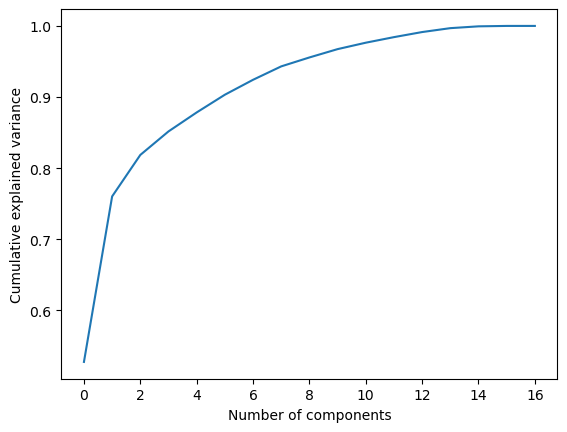

In [235]:
from sklearn.decomposition import PCA
df_pca=scaled_data.drop('Country', axis=1)

# Instantiate PCA object with maximum number of components
pca = PCA()

# Fit the PCA model on the standardized data
pca.fit(df_pca)

# Plot the scree plot to visualize the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


### Key Insights from Scree Plot:
4 clusters giving 85% variance of the data

In [237]:
pca = PCA(n_components = 4)
pca_values_4 = pca.fit_transform(df_pca)

In [238]:
pca_values_4

array([[-0.10736782,  0.42980844, -0.64638576,  0.16030586],
       [-1.16704526,  0.86308287,  0.33979283,  0.13549324],
       [-1.08184525,  0.48306962,  0.24699936,  0.13868048],
       ...,
       [ 0.2825352 , -0.71137043,  0.18062797, -0.0266489 ],
       [ 0.82040274,  0.12933477, -0.04695766,  0.44258627],
       [-0.15561572, -0.92319264, -0.07136648, -0.04471766]])

In [239]:
var=pca.explained_variance_ratio_
var

array([0.52747635, 0.23276244, 0.05832497, 0.03307703])

In [240]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([52.75, 76.03, 81.86, 85.17])

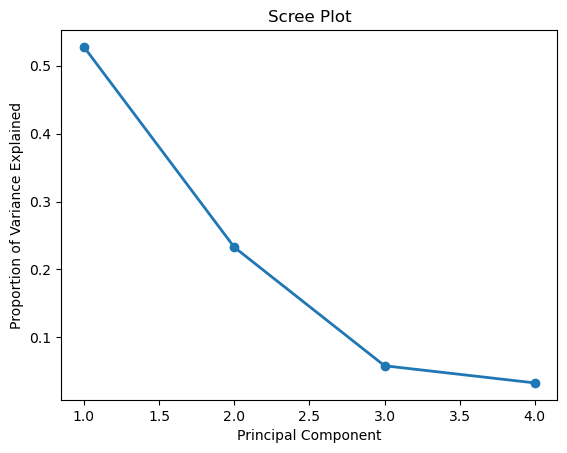

In [241]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

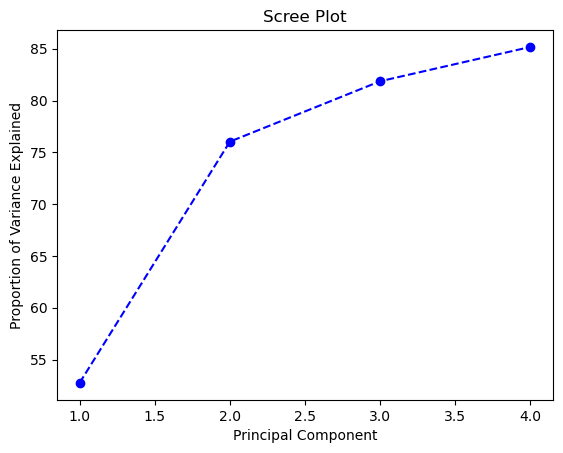

In [242]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), var1, marker='o' ,linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()


In [243]:
PCA_data=pd.DataFrame(pca_values_4[:,0:4], columns=['pc1','pc2','pc3','pc4'])

In [244]:
PCA_data.head()

,pc1,pc2,pc3,pc4
0,-0.107368,0.429808,-0.646386,0.160306
1,-1.167045,0.863083,0.339793,0.135493
2,-1.081845,0.483070,0.246999,0.138680
3,-0.873898,0.180508,0.119156,0.149652
4,-1.112258,0.729021,0.266581,-0.061815


## Factor Analysis Vs. Principle Component Analysis
- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.

## Using Factor Analysis for Dimensionality Reduction &  for Building Model
- Most importantly to unveil key factors which are influencing the results and giving high variance & also for interpreting the results

In [245]:
!pip install factor-analyzer

In [246]:
from factor_analyzer import FactorAnalyzer
df_factor=scaled_data.drop('Country', axis=1)
n_factors=10
fa = FactorAnalyzer(n_factors=n_factors)
factors=fa.fit(df_factor)
factors

FactorAnalyzer(n_factors=10, rotation_kwargs={})

In [247]:
ev, v = fa.get_eigenvalues()

In [140]:
ev

array([8.68789705e+00, 3.54660447e+00, 1.19750329e+00, 8.05243625e-01,
       5.94080729e-01, 4.84992685e-01, 3.86359891e-01, 3.02387046e-01,
       2.42206151e-01, 2.15435821e-01, 1.67639281e-01, 1.28181586e-01,
       1.08831917e-01, 6.02008826e-02, 5.62147027e-02, 1.61815668e-02,
       3.93044160e-05])

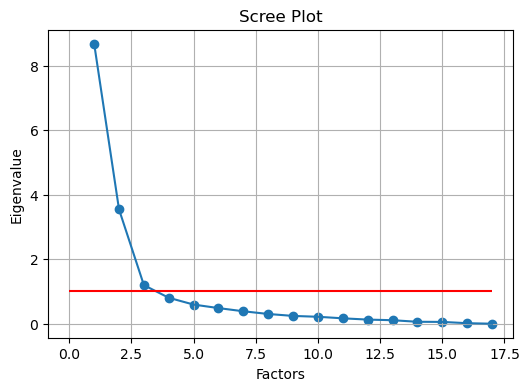

In [141]:

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df_factor.shape[1]+1),ev)
plt.plot(range(1,df_factor.shape[1]+1),ev)
plt.hlines(1, 0, df_factor.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [142]:
fa.loadings_

array([[-7.55366090e-01,  4.20262024e-02, -7.59711200e-02,
         6.38100163e-02,  3.79926854e-01, -1.84431915e-02,
        -2.14880526e-03, -2.31467900e-02, -7.21774876e-03,
         1.15013037e-01],
       [ 9.53168742e-02,  9.75274976e-01, -4.61764602e-02,
         4.59255316e-02,  6.67576168e-02,  6.86784537e-02,
        -7.40708968e-02, -1.47777089e-02, -2.06303383e-01,
        -8.89396925e-02],
       [-6.69072135e-02,  9.94535383e-01,  5.78812097e-02,
        -3.82732261e-02, -7.25636727e-02, -5.92769806e-02,
        -1.99397716e-01,  6.14464491e-03,  8.02475122e-02,
         4.79549821e-02],
       [-2.74000772e-02,  7.42713083e-01,  1.87529554e-02,
         6.84733377e-03, -2.98481964e-02,  8.81046641e-03,
         2.83776843e-01,  3.51118098e-02,  5.75488018e-02,
         5.40719929e-02],
       [-5.41603392e-02,  2.01113234e-02,  6.56415018e-01,
        -3.44880685e-02,  1.28702219e-01,  3.02003465e-03,
         1.56137206e-02, -2.33034776e-02,  7.13277719e-02,
        -2.

In [143]:
fa.get_communalities()

array([0.74069251, 1.02983755, 1.05570807, 0.64173837, 0.45870792,
       1.09547754, 0.32042704, 1.03112307, 1.04136327, 1.08613943,
       0.56084878, 0.97613433, 0.64262335, 0.73036851, 0.91305926,
       0.4933461 , 0.72653622])

In [144]:
# Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa_data=fa.fit(df_factor)
loads = fa.loadings_
print(loads)

[[-0.93684249 -0.12006518 -0.16516522]
 [ 0.21003899  0.91997758 -0.07325907]
 [ 0.0869163   0.89201839  0.05630285]
 [ 0.23002869  0.85162142  0.3842339 ]
 [ 0.12557424  0.05581258  0.45548142]
 [-0.8649828  -0.0621496  -0.12245719]
 [ 0.58673496  0.06454273  0.60861264]
 [ 0.91894985  0.08923749  0.17713787]
 [ 0.87804136  0.08118868  0.21416621]
 [ 0.51760577  0.07767033  0.47585024]
 [-0.87025463 -0.19434757 -0.29272354]
 [ 0.86867408  0.17368742  0.09616586]
 [ 0.62557568  0.17910453  0.46622705]
 [-0.12484036  0.81525057 -0.1348806 ]
 [ 0.59426712  0.12999526  0.29650479]
 [ 0.29389074  0.70186644  0.46663771]
 [ 0.26406139  0.78297855  0.44382924]]


In [146]:
# Reset index of df1_normal and create a new DataFrame for the loadings
df_factor = df_factor.reset_index(drop=True)
loads = pd.DataFrame(loads, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=df_factor.columns)
print(loads)

                        Factor 1  Factor 2  Factor 3
Birth_Rate             -0.936842 -0.120065 -0.165165
CO2_Emissions           0.210039  0.919978 -0.073259
Energy_Usage            0.086916  0.892018  0.056303
GDP                     0.230029  0.851621  0.384234
Health_Exp%GDP          0.125574  0.055813  0.455481
Infant_Mortality_Rate  -0.864983 -0.062150 -0.122457
Internet_Usage          0.586735  0.064543  0.608613
Life_Expectancy_Female  0.918950  0.089237  0.177138
Life_Expectancy_Male    0.878041  0.081189  0.214166
Mobile_Phone_Usage      0.517606  0.077670  0.475850
Population_0to14       -0.870255 -0.194348 -0.292724
Population_15to64       0.868674  0.173687  0.096166
Population_65plus       0.625576  0.179105  0.466227
Population_Total       -0.124840  0.815251 -0.134881
Population_Urban        0.594267  0.129995  0.296505
Tourism_Inbound         0.293891  0.701866  0.466638
Tourism_Outbound        0.264061  0.782979  0.443829


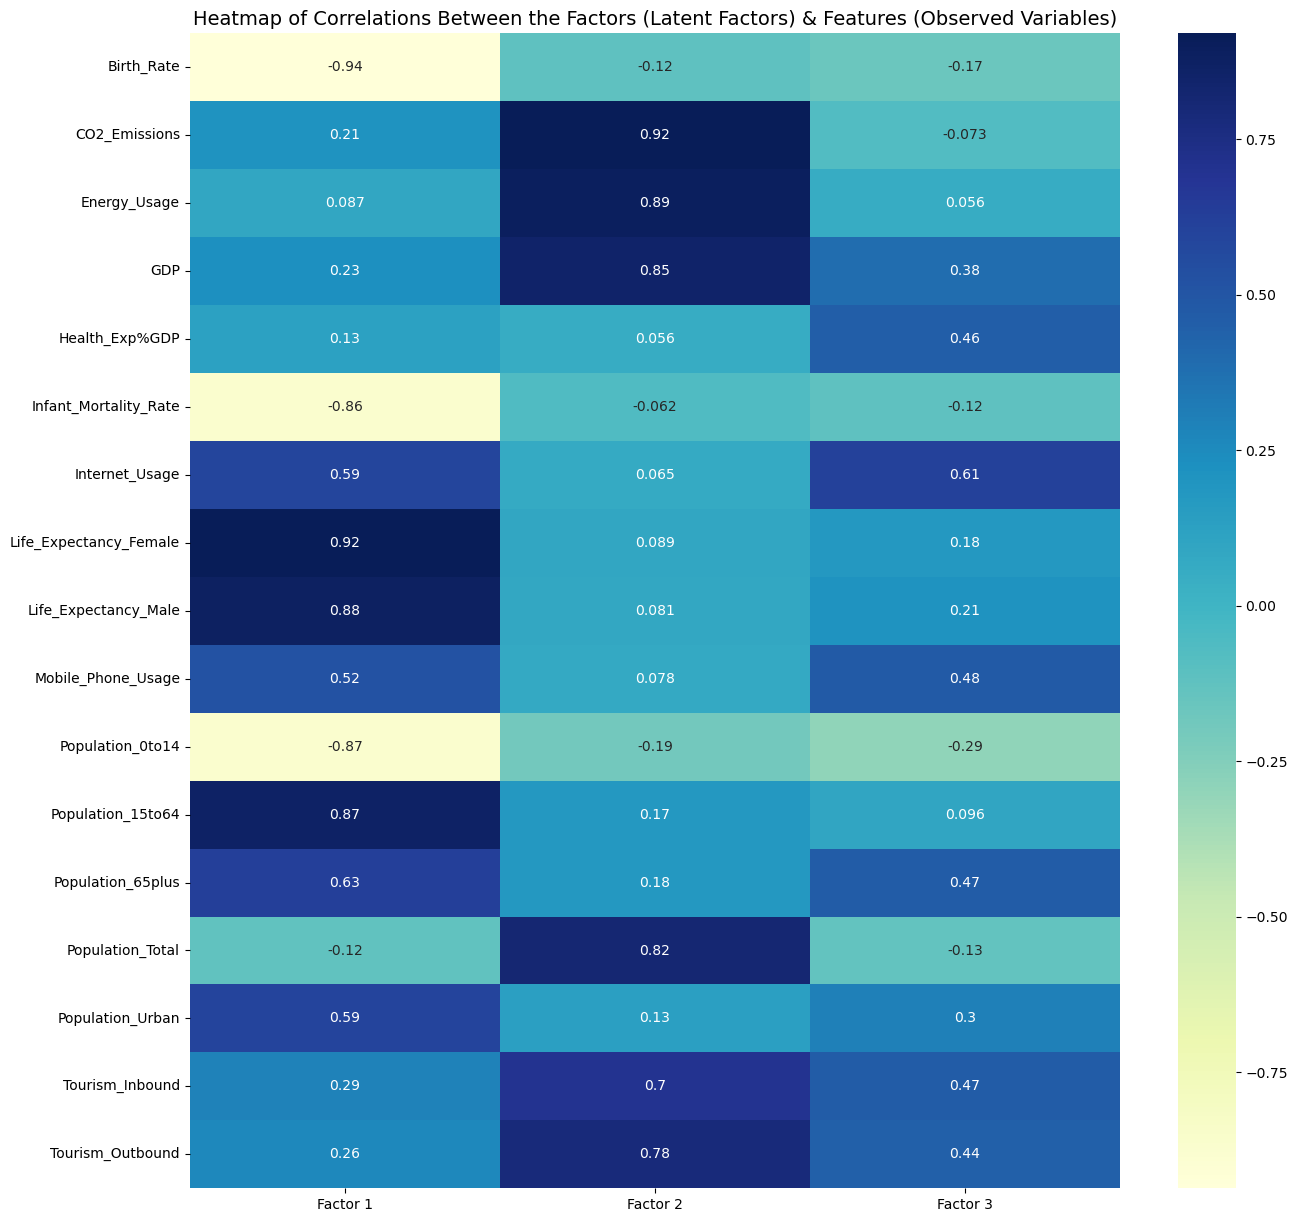

In [147]:
#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Correlations Between the Factors (Latent Factors) & Features (Observed Variables)', fontsize=14)
plt.show()

## Key Insights from Correlation Heatmap of Factors and Features:
- Factor 1: Life Expectancy Female, birth rate, infant mortality rate, life expectancy male and population from 0-14, 15-64 are highly influencing
- Factor 2: CO2 Emissions, Energy Usage GDP are highly influencing
- Factor 3: Health expenditure per capita, Tourism outbound & inbound are mostly impacting


In [148]:
# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)

                       0         1         2
SS loadings     6.401943  4.300682  1.913145
Proportion Var  0.376585  0.252981  0.112538
Cumulative Var  0.376585  0.629566  0.742104


### Insights from Factor Analysis: 
- Three factors has given the 74 % variation of the dataset

### Creating a Dendogram with Single method for Scaled  dataset

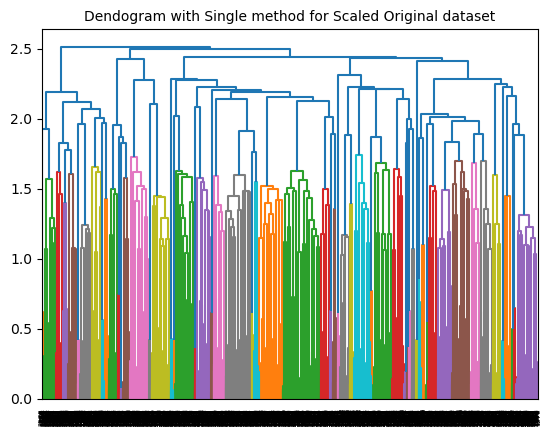

In [149]:
# Dendogram with Complete method for scaled data
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='single'))
plt.title('Dendogram with Single method for Scaled Original dataset', fontsize=10)
plt.show()

### Creating a Dendogram with Complete method for Scaled Original dataset

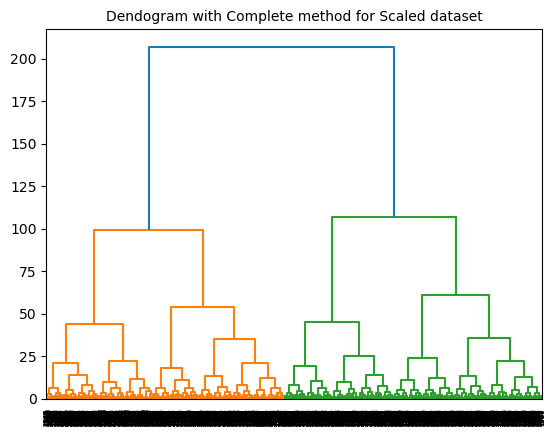

In [154]:
# Dendogram with Complete method for scaled data
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='complete'))
plt.title('Dendogram with Complete method for Scaled dataset', fontsize=10)
plt.show()

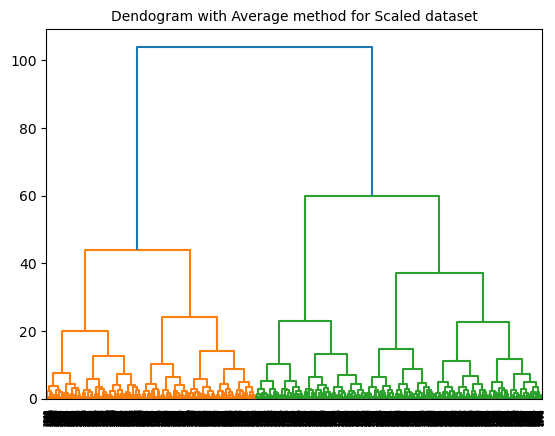

In [155]:
# Dendogram with Average method for scaled data
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='average'))
plt.title('Dendogram with Average method for Scaled dataset', fontsize=10)
plt.show()

## Hierarchical Clustering for Scaled Data with Single method

In [156]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_norm=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='single')
hierarchy_norm.fit(scaled_data)

AgglomerativeClustering(affinity='Euclidean', linkage='single', n_clusters=4)

In [157]:
hierarchy_norm_labels=hierarchy_norm.labels_
hierarchy_norm_labels
print('The Total clusters for Scaled data using Hierarchical Clustering are: ', np.unique(hierarchy_norm_labels))

The Total clusters for Scaled data using Hierarchical Clustering are:  [0 1 2 3]


In [158]:
# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_scaled=silhouette_score(scaled_data,hierarchy_norm_labels)
sil_score_hierarchy_scaled

0.5133016869796871

In [159]:
clr=pd.DataFrame()
clr['Country']=df['Country']
clr['Hierarchy_Scaled_Data']=hierarchy_norm_labels

In [160]:
# Cluster 0
cluster_H0=clr[(clr['Hierarchy_Scaled_Data'] == 0)]

# Cluster 1
cluster_H1=clr[(clr['Hierarchy_Scaled_Data'] == 1)]

# Cluster 2
cluster_H2=clr[(clr['Hierarchy_Scaled_Data'] == 2)]

# Cluster 3
cluster_H3=clr[(clr['Hierarchy_Scaled_Data'] == 3)]


In [161]:
clr

,Country,Hierarchy_Scaled_Data
0,Algeria,0
1,Angola,0
2,Benin,0
3,Botswana,0
4,Burkina Faso,0
...,...,...
2699,Turks and Caicos Islands,3
2700,United States,3
2701,Uruguay,3
2702,"Venezuela, RB",3


In [162]:
cluster_H0['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Afghanistan', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China',
       'Georgia', 'Hong Kong SAR, China', 'Albania', 'Andorra', 'Austria',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Bahrain', 'American Samoa', 'Australia',
       'Fiji', 'French Polynesia', 'Guam', 'Antigua and Barbuda',
       'Argentina', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Canada',

In [163]:
cluster_H1['Country'].unique()

array(['Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kyrgyz Republic',
       'Lao PDR', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia',
       'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Ireland',
       'Isle of Man', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russian Federation', 'Iran, Islamic Rep.',
       'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar',
       'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.',
       'New Caledonia', 'New Zealand', 'Papua New Guinea', 'Jamaica',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico'],
      dtype=obje

In [164]:
cluster_H2['Country'].unique()

array(['Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
       'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
       'Swaziland', 'Singapore', 'Sri Lanka', 'San Marino', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Saudi Arabia', 'Samoa',
       'Solomon Islands', 'Sint Maarten (Dutch part)',
       'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)',
       'St. Vincent and the Grenadines', 'Suriname'], dtype=object)

In [165]:
cluster_H3['Country'].unique()

array(['Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan',
       'Uzbekistan', 'Vietnam', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Syrian Arab Republic',
       'United Arab Emirates', 'Yemen, Rep.', 'Tonga', 'Vanuatu',
       'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States',
       'Uruguay', 'Venezuela, RB', 'Virgin Islands (U.S.)'], dtype=object)

## Hierarchical Clustering for Scaled Data with Complete method

In [178]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_complete=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='complete')
hierarchy_complete.fit(scaled_data)

AgglomerativeClustering(affinity='Euclidean', linkage='complete', n_clusters=4)

In [179]:
hierarchy_complete_labels=hierarchy_complete.labels_
hierarchy_complete_labels
print('The Total clusters for Original Scaled data using Hierarchical Clustering are: ', np.unique(hierarchy_complete_labels))

The Total clusters for Original Scaled data using Hierarchical Clustering are:  [0 1 2 3]


In [201]:
# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_scaled=silhouette_score(scaled_data,hierarchy_complete_labels)
sil_score_hierarchy_scaled

0.5572577099751523

In [202]:
clr['Hierarchy_complete']=hierarchy_complete_labels

In [203]:
# Cluster 0
cluster_HC0=clr[(clr['Hierarchy_complete'] == 0)]

# Cluster 1
cluster_HC1=clr[(clr['Hierarchy_complete'] == 1)]

# Cluster 2
cluster_HC2=clr[(clr['Hierarchy_complete'] == 2)]

# Cluster 3
cluster_HC3=clr[(clr['Hierarchy_complete'] == 3)]


In [204]:
print('Cluster 0:','\n', cluster_HC0['Country'].unique(), '\n')
print('Cluster 1:','\n', cluster_HC1['Country'].unique(),'\n')
print('Cluster 2:','\n', cluster_HC2['Country'].unique(),'\n')
print('Cluster 3:','\n', cluster_HC3['Country'].unique(),'\n')

Cluster 0: 
 ['Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda'
 'Sao Tome and Principe' 'Senegal' 'Seychelles' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'Nepal' 'Pakistan' 'Philippines' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco'
 'Montenegro' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'San Marino' 'Serbia' 'Kuwait' 'Lebanon' 'Oman'
 'Qatar' 'Saudi Arabia' 'Marshall Islands' 'Micronesia, Fed. Sts.'
 'New Caledonia' 'New Zealand' 'Papua New Guinea' 'Samoa' 'Mexico'
 'Nicaragua' 'Panama' 'Paraguay' 'Peru' 'Puerto Rico'] 

Cluster 1: 
 ['Djibouti' 'Egypt, Arab Rep.' 'Equatorial Guinea' 'Eritrea' 'Ethiopia'
 'Gabon' 'Gambia, The' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya' 'Georgia'
 'Hong Kong SAR, China' 'India' 'Indonesia' 'Japan' 'Kazakhstan'
 'Korea, Dem. 

## Hierarchical Clustering for Scaled Data with Average method

In [205]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_avg=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='average')
hierarchy_avg.fit(scaled_data)

AgglomerativeClustering(affinity='Euclidean', linkage='average', n_clusters=4)

In [206]:
hierarchy_avg_labels=hierarchy_avg.labels_
hierarchy_avg_labels
print('The Total clusters for Original Scaled data using Hierarchical Clustering are: ', np.unique(hierarchy_avg_labels))

The Total clusters for Original Scaled data using Hierarchical Clustering are:  [0 1 2 3]


In [207]:
clr['Hierarchy_avg']=hierarchy_avg_labels

In [208]:
# Cluster 0
cluster_HA0=clr[(clr['Hierarchy_avg'] == 0)]

# Cluster 1
cluster_HA1=clr[(clr['Hierarchy_avg'] == 1)]

# Cluster 2
cluster_HA2=clr[(clr['Hierarchy_avg'] == 2)]

# Cluster 3
cluster_HA3=clr[(clr['Hierarchy_avg'] == 3)]


In [209]:
print('Cluster 0:','\n', cluster_HA0['Country'].unique(), '\n')
print('Cluster 1:','\n', cluster_HA1['Country'].unique(),'\n')
print('Cluster 2:','\n', cluster_HA2['Country'].unique(),'\n')
print('Cluster 3:','\n', cluster_HA3['Country'].unique(),'\n')

Cluster 0: 
 ['Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Pakistan'
 'Philippines' 'Singapore' 'Sri Lanka' 'Tajikistan' 'Thailand'
 'Timor-Leste' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'San Marino'
 'Serbia' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'Oman' 'Qatar' 'Saudi Arabia'
 'Syrian Arab Republic' 'United Arab Emirates' 'Yemen, Rep.'
 'New Caledonia' 'New Zealand' 'Papua New Guinea' 'Samoa'
 'Solomon Islands' 'Tonga' 'Vanuatu' 'Nicaragua' 'Panama' 'Paraguay'
 'Peru' 'Puerto Rico' 'Sint Maarten (Dutch part)' 'St. Kitts and Nevis'
 'St. Lucia' 'St. Martin (French part)' 'St. Vincent and the Grenadines'
 'Suriname' 'Trinidad and Tobago' 'Turks and Caicos Islands'
 'United States' 'Uruguay' 'Venez

## Building KMeans Clustering Model for Scaled Data

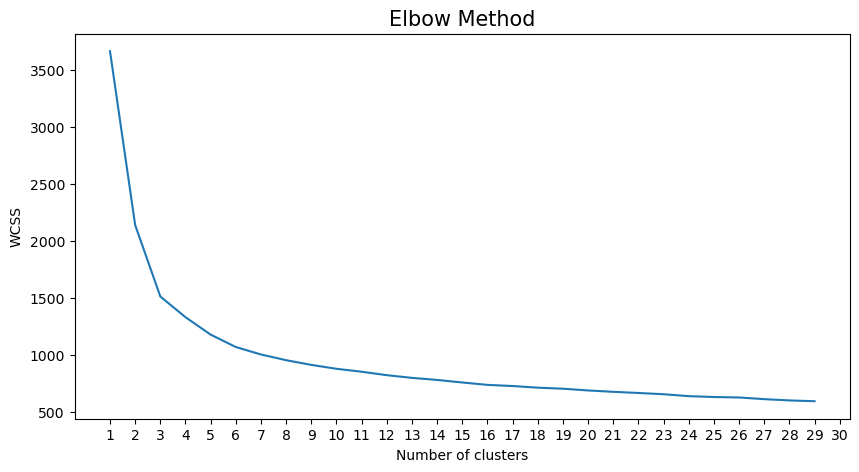

In [210]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(rb_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method', fontsize=15)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Key Insights from the Above Plot:
- We can observe that the most of the variance is covered with 4 clusters
- There is not much variance in the plot after 4rth cluster, the line almost flattened through the all remaining clusters

In [211]:
# Lets build the KMeans model with 4 clusters
kmeans_norm = KMeans(n_clusters=4,random_state=0)
kmeans_norm.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [212]:
clusters_norm=kmeans_norm.labels_
np.unique(clusters_norm)

array([0, 1, 2, 3])

In [213]:
# Silhouette Score for Kmeans Clustering model and scaled data 
sil_kmeans_norm=silhouette_score(scaled_data,clusters_norm)
sil_kmeans_norm

0.5681552000964348

In [214]:
clr['kmeans_scaled_data']=clusters_norm

In [215]:
clr['kmeans_scaled_data'].value_counts()

1    689
0    676
2    676
3    663
Name: kmeans_scaled_data, dtype: int64

In [216]:
# Cluster 0
cluster_kmeans_0=clr[(clr['kmeans_scaled_data'] == 0)]
cluster_kmeans_0=cluster_kmeans_0['Country'].unique()

# Cluster 1
cluster_kmeans_1=clr[(clr['kmeans_scaled_data'] == 1)]
cluster_kmeans_1=cluster_kmeans_1['Country'].unique()

# Cluster 2
cluster_kmeans_2=clr[(clr['kmeans_scaled_data'] == 2)]
cluster_kmeans_2=cluster_kmeans_2['Country'].unique()

# Cluster 3
cluster_kmeans_3=clr[(clr['kmeans_scaled_data'] == 3)]
cluster_kmeans_3=cluster_kmeans_3['Country'].unique()


In [217]:
print('Cluster 0 Length',len(cluster_kmeans_0))
print('Cluster 1 Length',len(cluster_kmeans_1))
print('Cluster 2 Length',len(cluster_kmeans_2))
print('Cluster 3 Length',len(cluster_kmeans_3))


Cluster 0 Length 52
Cluster 1 Length 53
Cluster 2 Length 52
Cluster 3 Length 51


In [218]:
print('Cluster 0:','\n', cluster_kmeans_0, '\n')
print('Cluster 1:','\n', cluster_kmeans_1,'\n')
print('Cluster 2:','\n', cluster_kmeans_2,'\n')
print('Cluster 3:','\n', cluster_kmeans_3,'\n')

Cluster 0: 
 ['Djibouti' 'Egypt, Arab Rep.' 'Equatorial Guinea' 'Eritrea' 'Ethiopia'
 'Gabon' 'Gambia, The' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya' 'Georgia'
 'Hong Kong SAR, China' 'India' 'Indonesia' 'Japan' 'Kazakhstan'
 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic' 'Estonia'
 'Faeroe Islands' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Isle of Man' 'Italy' 'Kosovo' 'Iran, Islamic Rep.'
 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Fiji' 'French Polynesia' 'Guam'
 'Kiribati' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Greenland' 'Grenada' 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica'] 

Cluster 1: 
 ['Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'Nepal' 'Pakistan' 'Philippines' 'Latvia' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco' 'Mon

In [248]:
PCA_data

,pc1,pc2,pc3,pc4
0,-0.107368,0.429808,-0.646386,0.160306
1,-1.167045,0.863083,0.339793,0.135493
2,-1.081845,0.483070,0.246999,0.138680
3,-0.873898,0.180508,0.119156,0.149652
4,-1.112258,0.729021,0.266581,-0.061815
...,...,...,...,...
2699,-0.264514,-0.760386,-0.199825,0.361768
2700,1.776882,0.254938,0.271260,-0.296323
2701,0.282535,-0.711370,0.180628,-0.026649
2702,0.820403,0.129335,-0.046958,0.442586


### Creating a Dendogram with Single method for PCA data

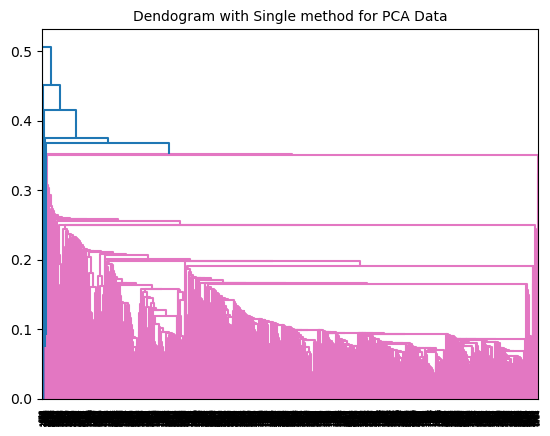

In [249]:
# Dendogram with Complete method for scaled data
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(PCA_data,method='single'))
plt.title('Dendogram with Single method for PCA Data', fontsize=10)
plt.show()

### Dendogram with Complete method for PCA data

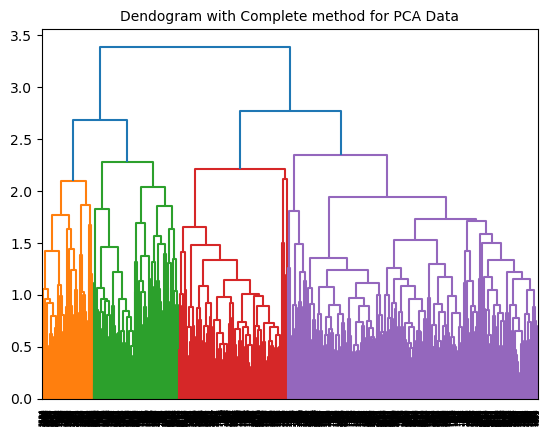

In [250]:
# Dendogram with Complete method for scaled data
dendrogram=sch.dendrogram(sch.linkage(rb_data,method='complete'))
plt.title('Dendogram with Complete method for PCA Data', fontsize=10)
plt.show()

### Dendogram with Average method for PCA data

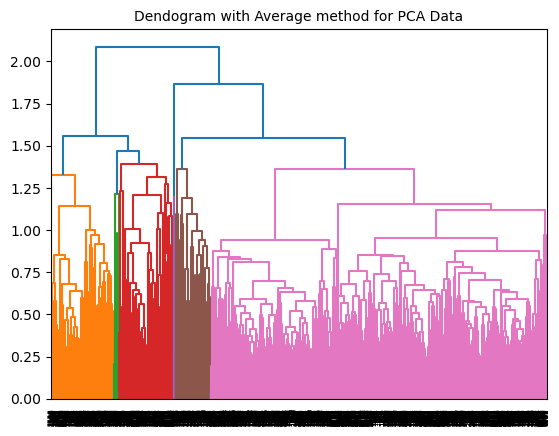

In [251]:
# Dendogram with Complete method for scaled data
dendrogram=sch.dendrogram(sch.linkage(rb_data,method='average'))
plt.title('Dendogram with Average method for PCA Data', fontsize=10)
plt.show()

## Hierarchical Clustering for PCA Data with Single method

In [252]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_pca=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='single')
hierarchy_pca.fit(PCA_data)

hierarchy_pca_labels=hierarchy_pca.labels_
hierarchy_pca_labels
print('The Total clusters for PCA data using Hierarchical Single method are: ', np.unique(hierarchy_pca_labels),'\n')

# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_pca=silhouette_score(PCA_data,hierarchy_pca_labels)
print('Silhouette Score for PCA with Hierarchical Single method ', sil_score_hierarchy_pca, '\n')


clr['Hierarchy_pca']=hierarchy_pca_labels

# Cluster 0
cluster_HP0=clr[(clr['Hierarchy_pca'] == 0)]

# Cluster 1
cluster_HP1=clr[(clr['Hierarchy_pca'] == 1)]

# Cluster 2
cluster_HP2=clr[(clr['Hierarchy_pca'] == 2)]

# Cluster 3
cluster_HP3=clr[(clr['Hierarchy_pca'] == 3)]

print('Cluster 0:','\n', cluster_HP0['Country'].unique(), '\n')
print('Cluster 1:','\n', cluster_HP1['Country'].unique(),'\n')
print('Cluster 2:','\n', cluster_HP2['Country'].unique(),'\n')
print('Cluster 3:','\n', cluster_HP3['Country'].unique(),'\n')

The Total clusters for PCA data using Hierarchical Single method are:  [0 1 2 3] 

Silhouette Score for PCA with Hierarchical Single method  0.17875923373320748 

Cluster 0: 
 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Re

## Hierarchical Clustering for PCA Data with Complete Method

In [253]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_pcac=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='complete')
hierarchy_pcac.fit(PCA_data)

hierarchy_pcac_labels=hierarchy_pcac.labels_
hierarchy_pcac_labels
print('The Total clusters for PCA data using Hierarchical Complete method are: ', np.unique(hierarchy_pcac_labels),'\n')

# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_pcac=silhouette_score(PCA_data,hierarchy_pcac_labels)
print('Silhouette Score for PCA with Hierarchical complete method ', sil_score_hierarchy_pcac, '\n')


clr['Hierarchy_pcac']=hierarchy_pcac_labels

# Cluster 0
cluster_HPC0=clr[(clr['Hierarchy_pcac'] == 0)]

# Cluster 1
cluster_HPC1=clr[(clr['Hierarchy_pcac'] == 1)]

# Cluster 2
cluster_HPC2=clr[(clr['Hierarchy_pcac'] == 2)]

# Cluster 3
cluster_HPC3=clr[(clr['Hierarchy_pcac'] == 3)]

print('Cluster 0:','\n', cluster_HPC0['Country'].unique(), '\n')
print('Cluster 1:','\n', cluster_HPC1['Country'].unique(),'\n')
print('Cluster 2:','\n', cluster_HPC2['Country'].unique(),'\n')
print('Cluster 3:','\n', cluster_HPC3['Country'].unique(),'\n')

The Total clusters for PCA data using Hierarchical Complete method are:  [0 1 2 3] 

Silhouette Score for PCA with Hierarchical Single method  0.4083815787030737 

Cluster 0: 
 ['Algeria' 'Egypt, Arab Rep.' 'Morocco' 'Nigeria' 'South Africa'
 'Bangladesh' 'China' 'India' 'Indonesia' 'Kazakhstan' 'Korea, Dem. Rep.'
 'Malaysia' 'Myanmar' 'Pakistan' 'Philippines' 'Thailand' 'Uzbekistan'
 'Vietnam' 'Czech Republic' 'Poland' 'Romania' 'Russian Federation'
 'Turkey' 'Ukraine' 'Iran, Islamic Rep.' 'Iraq' 'Saudi Arabia'
 'Syrian Arab Republic' 'Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico'
 'Peru' 'Venezuela, RB' 'Ethiopia' 'Ghana' 'Kenya' 'Madagascar' 'Sudan'
 'Tanzania' 'Nepal' 'Sri Lanka' 'Yemen, Rep.' 'Somalia'] 

Cluster 1: 
 ['Hong Kong SAR, China' 'Japan' 'Korea, Rep.' 'Singapore' 'Austria'
 'Belgium' 'France' 'Germany' 'Greece' 'Italy' 'Netherlands' 'Portugal'
 'Spain' 'Sweden' 'Switzerland' 'United Kingdom' 'Australia' 'Canada'
 'United States' 'Denmark' 'Norway' 'Czech Republic' 'I

## Hierarchical Clustering for PCA Data with Average Method

In [254]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_pcaa=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='average')
hierarchy_pcaa.fit(PCA_data)

hierarchy_pcaa_labels=hierarchy_pcaa.labels_
hierarchy_pcaa_labels
print('The Total clusters for PCA data using Hierarchical Average method are: ', np.unique(hierarchy_pcaa_labels),'\n')

# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_pcaa=silhouette_score(PCA_data,hierarchy_pcaa_labels)
print('Silhouette Score for PCA with Hierarchical Average method ', sil_score_hierarchy_pcaa, '\n')


clr['Hierarchy_pcaa']=hierarchy_pcaa_labels

# Cluster 0
cluster_HPA0=clr[(clr['Hierarchy_pcaa'] == 0)]

# Cluster 1
cluster_HPA1=clr[(clr['Hierarchy_pcaa'] == 1)]

# Cluster 2
cluster_HPA2=clr[(clr['Hierarchy_pcaa'] == 2)]

# Cluster 3
cluster_HPA3=clr[(clr['Hierarchy_pcaa'] == 3)]

print('Cluster 0:','\n', cluster_HPA0['Country'].unique(), '\n')
print('Cluster 1:','\n', cluster_HPA1['Country'].unique(),'\n')
print('Cluster 2:','\n', cluster_HPA2['Country'].unique(),'\n')
print('Cluster 3:','\n', cluster_HPA3['Country'].unique(),'\n')

The Total clusters for PCA data using Hierarchical Average method are:  [0 1 2 3] 

Silhouette Score for PCA with Hierarchical Average method  0.3347124190664943 

Cluster 0: 
 ['China' 'Hong Kong SAR, China' 'India' 'Indonesia' 'Japan'
 'Korea, Dem. Rep.' 'Korea, Rep.' 'Malaysia' 'Singapore' 'Thailand'
 'Austria' 'Belgium' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Ireland' 'Italy' 'Netherlands' 'Norway'
 'Poland' 'Portugal' 'Russian Federation' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom' 'Israel' 'Saudi Arabia' 'United Arab Emirates'
 'Australia' 'Argentina' 'Brazil' 'Canada' 'Mexico' 'United States'
 'Iran, Islamic Rep.' 'South Africa' 'Kuwait' 'Egypt, Arab Rep.' 'Ukraine'
 'New Zealand' 'Romania' 'Venezuela, RB' 'Qatar' 'Vietnam' 'Chile'
 'Morocco' 'Colombia' 'Lebanon' 'Philippines' 'Kazakhstan'
 'Syrian Arab Republic' 'Peru'] 

Cluster 1: 
 ['Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' '

# Kmeans for PCA Data

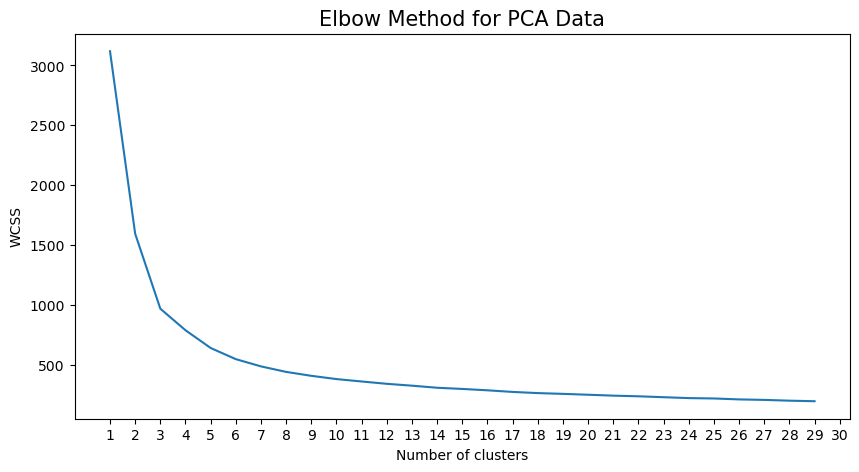

In [255]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(PCA_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method for PCA Data', fontsize=15)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [256]:
# Lets build the KMeans model with 4 clusters
kmeans_pca = KMeans(n_clusters=5,random_state=0)
kmeans_pca.fit(PCA_data)

KMeans(n_clusters=5, random_state=0)

In [257]:
kmeans_pca_labels=kmeans_pca.labels_

In [258]:
# Silhouette Score for Kmeans Clustering model and PCA data 
sil_pca=silhouette_score(PCA_data,kmeans_pca_labels)
sil_pca

0.44043242900843826

In [259]:
clr['pca_labels']=kmeans_pca_labels

In [260]:
clr.head()

,Country,Hierarchy_Scaled_Data,Hierarchy_complete,Hierarchy_avg,kmeans_scaled_data,Hierarchy_pca,Hierarchy_pcac,Hierarchy_pcaa,pca_labels
0,Algeria,0,3,3,3,0,0,3,4
1,Angola,0,3,3,3,0,2,1,2
2,Benin,0,3,3,3,0,2,1,2
3,Botswana,0,3,3,3,0,2,1,2
4,Burkina Faso,0,3,3,3,0,2,1,2


In [261]:
clr['pca_labels'].value_counts()

0    1026
2     810
3     353
1     279
4     236
Name: pca_labels, dtype: int64

In [262]:
# Cluster 4
kmeans_4=clr[(clr['pca_labels'] == 4)]
cluster_4=kmeans_4['Country'].unique()

# Cluster 3
kmeans_3=clr[(clr['pca_labels'] == 3)]
cluster_3=kmeans_3['Country'].unique()

# Cluster2
kmeans_2=clr[(clr['pca_labels'] == 2)]
cluster_2=kmeans_2['Country'].unique()

# Cluster 1
kmeans_1=clr[(clr['pca_labels'] == 1)]
cluster_1=kmeans_1['Country'].unique()

# Cluster 0
kmeans_0=clr[(clr['pca_labels'] == 0)]
cluster_0=kmeans_0['Country'].unique()

In [264]:
print(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4))

281


In [265]:
print('Cluster 0:','\n', cluster_0, '\n')
print('Cluster 1:','\n', cluster_1,'\n')
print('Cluster 2:','\n', cluster_2,'\n')
print('Cluster 3:','\n', cluster_3,'\n')

Cluster 0: 
 ['Libya' 'Mauritius' 'Seychelles' 'Tunisia' 'Armenia' 'Azerbaijan'
 'Brunei Darussalam' 'Georgia' 'Macao SAR, China' 'Sri Lanka' 'Albania'
 'Andorra' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia'
 'Cyprus' 'Estonia' 'Faeroe Islands' 'Hungary' 'Iceland' 'Ireland'
 'Isle of Man' 'Kosovo' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'San Marino'
 'Serbia' 'Slovak Republic' 'Slovenia' 'Bahrain' 'Jordan' 'Kuwait'
 'Lebanon' 'Oman' 'Qatar' 'American Samoa' 'French Polynesia' 'Guam'
 'Marshall Islands' 'New Caledonia' 'New Zealand' 'Antigua and Barbuda'
 'Aruba' 'Bahamas, The' 'Barbados' 'Bermuda' 'Cayman Islands' 'Chile'
 'Costa Rica' 'Cuba' 'Curacao' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Greenland' 'Grenada' 'Jamaica' 'Panama' 'Puerto Rico'
 'Sint Maarten (Dutch part)' 'St. Kitts and Nevis' 'St. Lucia'
 'St. Martin (French part)' 'St. Vincent and the Grenadines' 'Suriname'
 'Trinidad and Tobago' 'Tur

# DBSCAN Clustering 

In [266]:
# DBSCAN model for Scaled data
from sklearn.cluster import DBSCAN

In [267]:
dbscan=DBSCAN(eps=0.5, min_samples=6)

In [268]:
dbscan.fit(PCA_data)

DBSCAN(min_samples=6)

In [269]:
dbscan_labels=dbscan.labels_

In [270]:
# Silhouette Score 
sil_dbscan_norm=silhouette_score(rb_data,dbscan_labels)
sil_dbscan_norm

0.25872859964240963

In [271]:
# DBSCAN model for PCA data
dbscan_pca=DBSCAN(eps=0.5,min_samples=4)

In [272]:
dbscan_pca.fit(PCA_data)
dbscan_pca_labels=dbscan_pca.labels_

In [273]:
# Silhouette Score
sil_dbscan_pca=silhouette_score(PCA_data,dbscan_pca_labels)
sil_dbscan_pca

0.2880748356274111

In [274]:
clr['dbscan_pca']=dbscan_pca_labels

In [276]:

# Cluster 4
kmeans_4=clr[(clr['pca_labels'] == 4)]
cluster_4=kmeans_4['Country'].unique()

# Cluster 3
kmeans_3=clr[(clr['pca_labels'] == 3)]
cluster_3=kmeans_3['Country'].unique()

# Cluster2
kmeans_2=clr[(clr['pca_labels'] == 2)]
cluster_2=kmeans_2['Country'].unique()

# Cluster 1
kmeans_1=clr[(clr['pca_labels'] == 1)]
cluster_1=kmeans_1['Country'].unique()

# Cluster 0
kmeans_0=clr[(clr['pca_labels'] == 0)]
cluster_0=kmeans_0['Country'].unique()

In [278]:
print('Cluster 0:','\n', cluster_0,'\n')
print('Cluster 1:','\n', cluster_1,'\n')
print('Cluster 2:','\n', cluster_2,'\n')
print('Cluster 3:','\n', cluster_3,'\n')
print('Cluster 4:','\n', cluster_4,'\n')


Cluster 0: 
 ['Libya' 'Mauritius' 'Seychelles' 'Tunisia' 'Armenia' 'Azerbaijan'
 'Brunei Darussalam' 'Georgia' 'Macao SAR, China' 'Sri Lanka' 'Albania'
 'Andorra' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia'
 'Cyprus' 'Estonia' 'Faeroe Islands' 'Hungary' 'Iceland' 'Ireland'
 'Isle of Man' 'Kosovo' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'San Marino'
 'Serbia' 'Slovak Republic' 'Slovenia' 'Bahrain' 'Jordan' 'Kuwait'
 'Lebanon' 'Oman' 'Qatar' 'American Samoa' 'French Polynesia' 'Guam'
 'Marshall Islands' 'New Caledonia' 'New Zealand' 'Antigua and Barbuda'
 'Aruba' 'Bahamas, The' 'Barbados' 'Bermuda' 'Cayman Islands' 'Chile'
 'Costa Rica' 'Cuba' 'Curacao' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Greenland' 'Grenada' 'Jamaica' 'Panama' 'Puerto Rico'
 'Sint Maarten (Dutch part)' 'St. Kitts and Nevis' 'St. Lucia'
 'St. Martin (French part)' 'St. Vincent and the Grenadines' 'Suriname'
 'Trinidad and Tobago' 'Tur

### Conclusion:   We have selected KMeans Clustering  with scaled data as the best model for the given data set and the Silhouette Score is 0.56

- Cluster 2: Highly developed countries,
- Cluster 0: Moderately developed countries
- Cluster 1: Developing countries
- Cluster 3: Least developed countries